In [1]:

%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import time
import os
import sys
sys.path.append('/home/xilinx/jupyter_notebooks/')
sys.path.append('C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts')
import scipy as sp
import json
from scipy.fft import fft, fftfreq

from slab.instruments import *
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
from slab import Experiment, dsfit, AttrDict

# Figure params
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})

Warning serial library import failed.
Could not load InstrumentManagerWindow
Could not import QickInstrument, try install qick package
Could not load AD5780 dac 
Could not load labbrick
Could not load Autonics TM4 Driver


In [2]:
from slab.dsfit import *
import os
from scipy.interpolate import griddata
from numpy import mgrid, array, zeros,abs,pi,cos,transpose, linspace
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from tempfile import TemporaryFile
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
import json
from h5py import File
from datetime import datetime
import time
from slab.datamanagement import SlabFile
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from slab.dsfit import *
from scipy.optimize import curve_fit
# import experiments.fitting as fitter
from numpy.linalg import inv

## Import modules from parent and multimode expts

In [508]:
import json
import os

# Get the current working directory
path = os.getcwd()
print("Current Path:", path)

# Isolate the parent directory
data_parent_path = r'h:\Shared drives\SLab\Multimode\experiment\240911'
print("Data Parent Path:", data_parent_path)
parent_path = os.path.dirname(path)
print("Parent Path:", parent_path)

# Add the parent path to the sys.path
sys.path.append(parent_path)

Current Path: c:\_Lib\python\multimode_expts\analysis_notebooks
Data Parent Path: h:\Shared drives\SLab\Multimode\experiment\240911
Parent Path: c:\_Lib\python\multimode_expts


In [4]:
import sys

# Path to add
expts_path = 'C:\\_Lib\\python\\multimode_expts'

# Add the path to the system path at the highest priority
if expts_path not in sys.path:
    sys.path.insert(0, expts_path)
    print('Path added at highest priority')

# Verify the path is added
print(sys.path)


Path added at highest priority
['C:\\_Lib\\python\\multimode_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'C:\\_Lib\\python', 'C:\\_Lib\\python\\slab', 'C:\\_Lib\\python\\qick\\qick_lib', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'c:\\Users\\26049\\.conda\\envs\\slab\\python38.zip', 'c:\\Users\\26049\\.conda\\envs\\slab\\DLLs', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab', '', 'C:\\Users\\26049\\AppData\\Roaming\\Python\\Python38\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\easy_lmfit-1.0-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\attrdict-2.0.1-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\s

In [5]:
from multimode_expts.fit_display import *

importing from path  C:\_Lib\python\multimode_expts\experiments\clifford_averager_program.py
imported experiments.clifford_averager_program
importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qram_protocol_timestepped.py
imported experiments.qram_protocol_timestepped
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_read_spec
imported experiments.qubit_cavity.non_demolution_readout
imported experiments.qubit_cavity.out_and_back
imported experiments.qubit_cavity.photo_resolved_pulse_probe
impo

In [6]:
import experiments.fitting as fitter
from numpy.linalg import inv

# config

In [7]:
curr_path = os.getcwd()
config_file = expts_path+'\\config_rfsoc_ziqian.yml'
config_path = config_file
print('Config will be', config_path)


Config will be C:\_Lib\python\multimode_expts\config_rfsoc_ziqian.yml


In [8]:
qubit_i = 0
import yaml
with open(config_file, 'r') as cfg_file:
    yaml_cfg = yaml.safe_load(cfg_file)
yaml_cfg = AttrDict(yaml_cfg)

# Exp path

In [9]:

# print("path: ", path)

"""Reopen saved data"""
def prev_data(expt_path, filename):
    temp_data_file = expt_path+'\\'+filename
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        # print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs
data_parent =  r'H:\Shared drives\SLab\Multimode\experiment\240911'
expt_path=data_parent+'\\data1'
print('Data are extracted from', expt_path)

Data are extracted from H:\Shared drives\SLab\Multimode\experiment\240911\data1


# F0g1 Spectroscopy

Found peak in amps at [MHz] 2012.238353420051, HWHM 0.2694219184542896
Found peak in I at [MHz] 2012.2156833268537, HWHM 0.3813691592634866
Found peak in Q at [MHz] 2012.231621175017, HWHM -0.32455566194472873


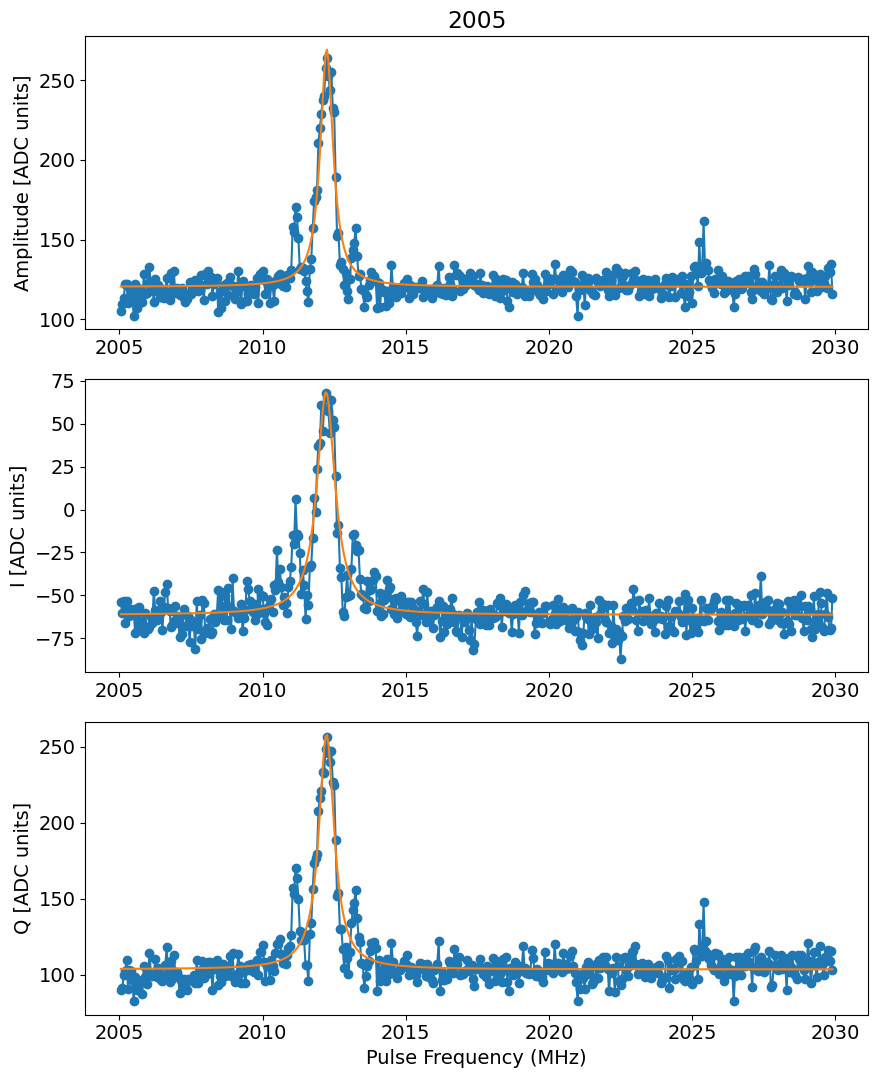

In [195]:
temp_data, attrs = prev_data(expt_path, '00018_PulseProbeF0g1SpectroscopyExperiment.h5')
#temp_data, attrs = prev_data(expt_path, '00122_fluxspectroscopy_f0g1_dc_flux_sweep.h5')

qubit_spectroscopy_display(temp_data, title=attrs['config']['expt']['start'], vlines=None)
# gain from attrs

# Length Rabi Sweep

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


File 00502_length_rabi_f0g1_sweep.h5 not found
File 00503_length_rabi_f0g1_sweep.h5 not found
File 00504_length_rabi_f0g1_sweep.h5 not found
File 00505_length_rabi_f0g1_sweep.h5 not found
File 00506_length_rabi_f0g1_sweep.h5 not found
File 00507_length_rabi_f0g1_sweep.h5 not found
File 00508_length_rabi_f0g1_sweep.h5 not found
File 00509_length_rabi_f0g1_sweep.h5 not found


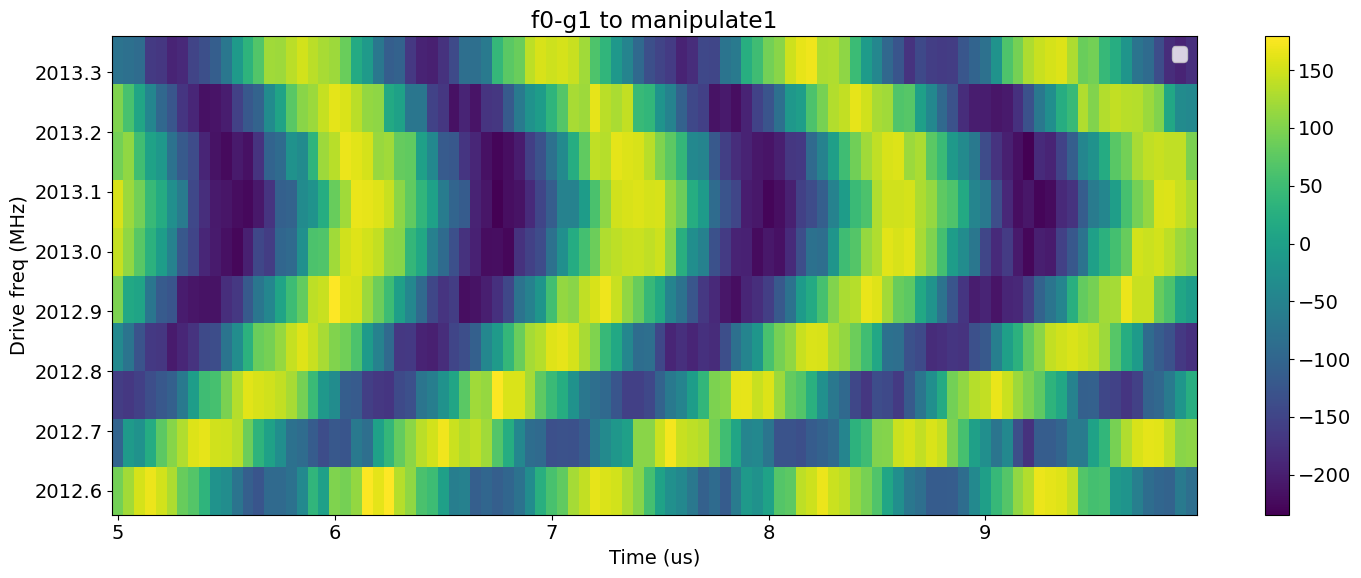

In [804]:
# file_list = np.arange(427, 450, 1) # -------
# file_list = np.concatenate(([470, 471, 472], np.arange(461, 469, 1))) # -------
file_list = np.arange(474, 488, 1) # -------
file_list = np.arange(492, 510, 1)
y_list = []
freq_list = []
name = '_length_rabi_f0g1_sweep.h5'
normalize = False


for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    try:
        temp_data, attrs = prev_data(expt_path, full_name)  # ef
        signal_y = temp_data['avgi'][0:-1]

        
        len_x = temp_data['xpts'][0:-1]
        y_list.append(signal_y)
        freq_list.append(attrs['config']['expt']['freq'])
    except FileNotFoundError:
        print(f'File {full_name} not found')
        continue

plot_sideband_sweep(len_x, freq_list, np.array(y_list), hlines=[], vlines=None, normalize = normalize, title="f0-g1 to manipulate1")

## Length rabi f0-g1 M1

[204.22964355   0.88906637  93.85946681  94.23005357 -20.28766618
  -2.93302302]
Decay from avgi [us] 94.23005357269454
Rate [MHz] 0.8890663658895916
Pi length from avgi data [us]: 0.5503292865661726
	Pi/2 length from avgi data [us]: 0.2691354301886993
Fit params:  [204.22964355   0.88906637  93.85946681  94.23005357 -20.28766618
  -2.93302302]

Decay from avgq [us] 45.74599043997323
Rate [MHz] 0.8905705953019697
Pi length from avgq data [us]: 0.5526038364012268
Pi/2 length from avgq data [us]: 0.2763019182006134
Fit params:  [199.66559091   0.8905706   92.83221808  45.74599044 -93.15399077
  -2.93302455]


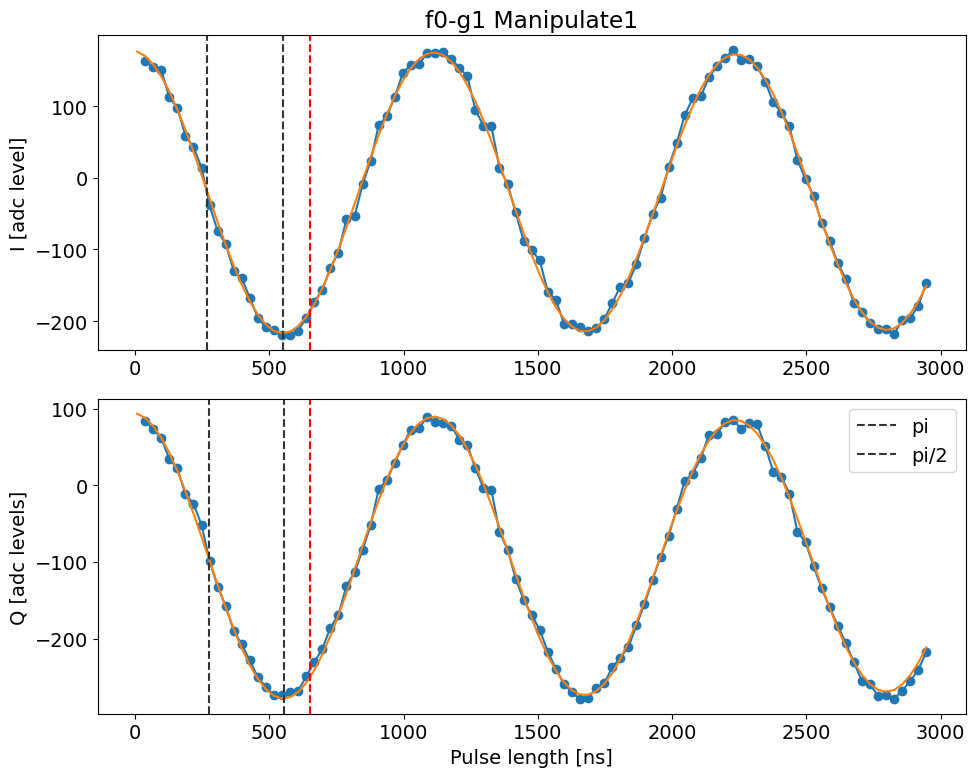

In [419]:
temp_data, attrs = prev_data(expt_path, '00014_LengthRabiGeneralF0g1Experiment.h5')  #
Ilist2 = length_rabi_display(temp_data, fit=True, fitparams=[None, None,None,None,None,None ],
                              vlines = [650],
                      normalize= [False, 'g_data', 'f_data'],
                       active_reset = False,  title='f0-g1 Manipulate1')

## Manipulate 1 T1

Fit T1 avgi [us]: 153.28652568468854
Fit T1 avgq [us]: 73.8963969301676


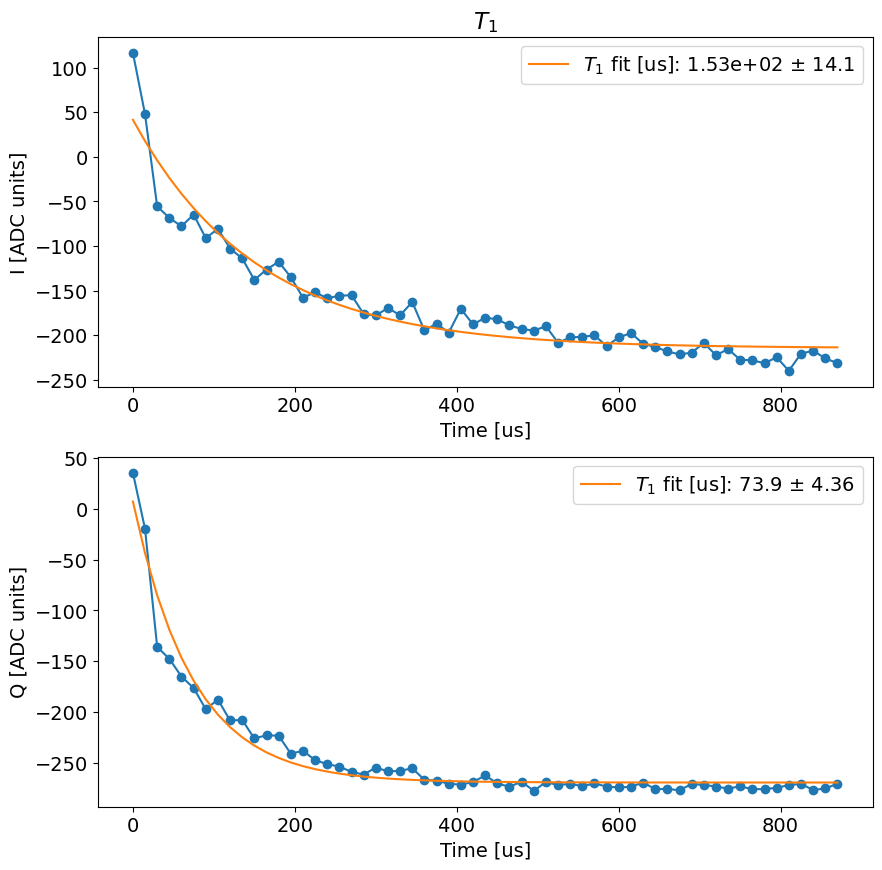

In [379]:
# DC flux=0.27, expid=1
# DC flux=0.17, expid=2
# temp_data, attrs = prev_data(expt_path, '00010_T1CavityExperiment.h5')
temp_data, attrs = prev_data(expt_path, '00086_cavity_t1_dc_flux_sweep_new.h5')
t1_display(data = temp_data, fit = True, active_reset = False)

In [307]:
attrs

{'config': {'prepulse_qubit': {'freq': [3568.1751638611518],
   'length': [0.06],
   'gain': [30],
   'phase': [0],
   'repeat_time': 10},
  'device': {'qubit': {'T1': 127.0,
    'f_ge': 3568.1751638611518,
    'f_ge_resolved': 3568.1751638611518,
    'f_ge_idle': 3568.1751638611518,
    'f_ef': 3425.5564066067,
    'f_ef_idle': 3425.5564066067,
    'ramp_sigma': 0.005,
    'ramp_sigma_num': 3,
    'pulses': {'pi_ge': {'gain': 10716,
      'sigma': 0.035,
      'length': 0,
      'type': 'gauss'},
     'pi_ge_ftop': {'gain': 3000,
      'sigma': 0.005,
      'length': 0.190914187445986,
      'type': 'flat_top'},
     'pi_ge_fast': {'gain': 10682,
      'sigma': 0.035,
      'length': 0,
      'type': 'gauss'},
     'pi_ge_resolved': {'gain': 50,
      'sigma': 0.005,
      'length': 6.553697146578866,
      'type': 'flat_top',
      'repeat_no': 1},
     'hpi_ge': {'gain': 5510, 'length': 0, 'sigma': 0.035, 'type': 'gauss'},
     'hpi_ge_ftop': {'gain': 3000,
      'sigma': 0.005,
   

# F0g1 Scan Dataset as a function of Coupler DC Flux

In [18]:
# Original lists
currents = [0.08, 0.12, 0.22, 0.32, 0.5, 0.27, 0.17, -0.1, -0.2, 0, 0.6, 0.55, 0.4, -0.15, -0.05]
f0g1_freqs = [
    1993.55, 1996.45, 2002.55, 2007, 2011.97, 
    2005, 1999.7, 1980.8, 1977.7, 1987.46, 2013.8, 2012.93, 2009.6, 1978.6, 1983.84
]
pi_lengths = [
    0.562878407, 0.573263647, 0.597216575, 0.604688822, 0.608122803, 
    0.607997218, 0.588880852, 0.556092728, 0.55045291, 0.556268435, 0.61,0.608686712, 0.606480529, 
    0.546402768, 0.5526038364012268



]

# Combine the lists and sort by currents
combined = sorted(zip(currents, f0g1_freqs, pi_lengths))

# Unzip the combined list back into separate lists
currents, f0g1_freqs, pi_lengths = zip(*combined)

# Convert back to lists
currents = list(currents)
f0g1_freqs = list(f0g1_freqs)
pi_lengths = list(pi_lengths)

print("Sorted currents:", currents)
print("Updated f0g1_freqs:", f0g1_freqs)
print("Updated pi_lengths:", pi_lengths)



Sorted currents: [-0.2, -0.15, -0.1, -0.05, 0, 0.08, 0.12, 0.17, 0.22, 0.27, 0.32, 0.4, 0.5, 0.55, 0.6]
Updated f0g1_freqs: [1977.7, 1978.6, 1980.8, 1983.84, 1987.46, 1993.55, 1996.45, 1999.7, 2002.55, 2005, 2007, 2009.6, 2011.97, 2012.93, 2013.8]
Updated pi_lengths: [0.55045291, 0.546402768, 0.556092728, 0.5526038364012268, 0.556268435, 0.562878407, 0.573263647, 0.588880852, 0.597216575, 0.607997218, 0.604688822, 0.606480529, 0.608122803, 0.608686712, 0.61]


In [19]:
# now creating a dataframe 
df = pd.DataFrame({'currents': currents, 'f0g1_freqs': f0g1_freqs, 'pi_lengths': pi_lengths})
df

,currents,f0g1_freqs,pi_lengths
0,-0.20,1977.70,0.550453
1,-0.15,1978.60,0.546403
2,-0.10,1980.80,0.556093
3,-0.05,1983.84,0.552604
4,0.00,1987.46,0.556268
5,0.08,1993.55,0.562878
6,0.12,1996.45,0.573264
7,0.17,1999.70,0.588881
8,0.22,2002.55,0.597217
9,0.27,2005.00,0.607997


Text(0, 0.5, 'Manipulate1 Frequency (GHz)')

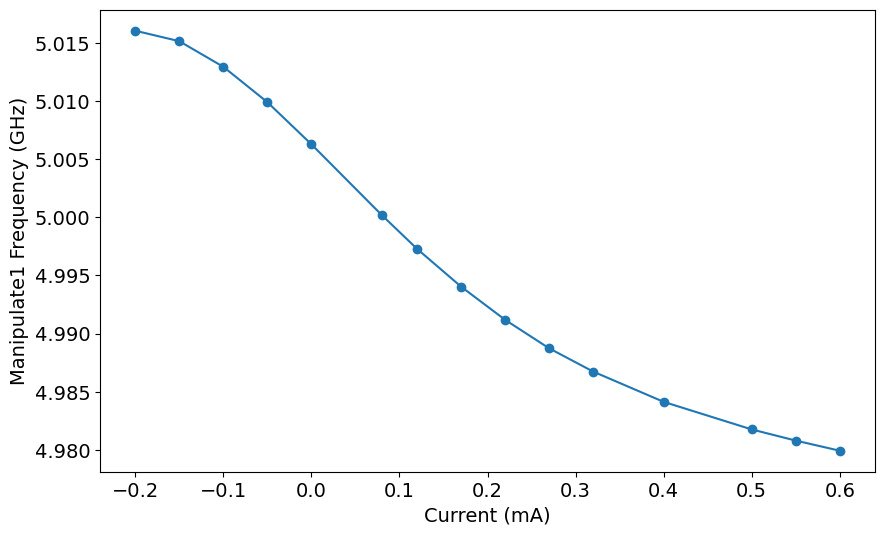

In [20]:
qubit_gf = yaml_cfg.device.qubit.f_ge[0] + yaml_cfg.device.qubit.f_ef[0]
# plot current vs f0g1_freqs
plt.plot(df['currents'], (-1 * np.array(df['f0g1_freqs'].values) + qubit_gf) * 1e-3, 'o-')
plt.xlabel('Current (mA)')
plt.ylabel('Manipulate1 Frequency (GHz)')

## Prepping for T1 scan on manipulate using interpolation of refernce data 

Interpolated frequency at current 0.55: 2012.93


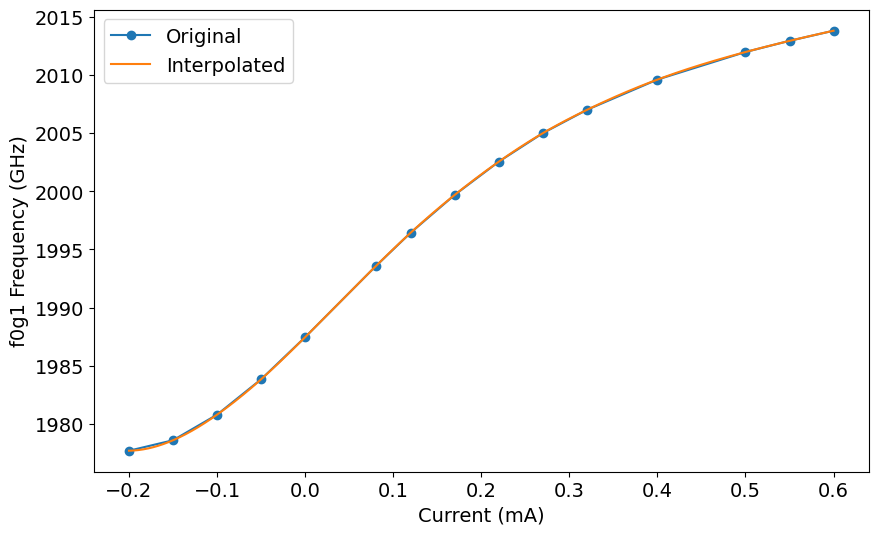

In [21]:

from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline, CubicSpline

# Original lists
currents = df['currents']
f0g1_freqs = df['f0g1_freqs']
pi_lengths = df['pi_lengths']

# Create interpolation function
interp_func = interp1d(currents, f0g1_freqs, kind='linear', fill_value="extrapolate")
interp_func = CubicSpline(currents, f0g1_freqs)#, k=2, s=0)

# Interpolate frequency at current of 0.55
current_to_interpolate = 0.55
interpolated_frequency = interp_func(current_to_interpolate)

print(f"Interpolated frequency at current {current_to_interpolate}: {interpolated_frequency}")
#plot 
plt.plot(currents, f0g1_freqs, 'o-', label='Original')
xdata = np.linspace(min(currents), max(currents), 1000)
plt.plot(xdata, interp_func(xdata), '-', label='Interpolated')
plt.xlabel('Current (mA)')
plt.ylabel('f0g1 Frequency (GHz)')
plt.legend()

In [22]:
interp_func(-0.05)

array(1983.84)

In [23]:
# Original lists
currents = df['currents']
f0g1_freqs = df['f0g1_freqs']
pi_lengths = df['pi_lengths']

# Create interpolation function
f0g1_interp_func = CubicSpline(currents, f0g1_freqs)#, kind='linear', fill_value="extrapolate")
pi_interp_func = interp1d(currents, pi_lengths)#, kind='linear', fill_value="extrapolate")

# currents
custom_currents = [0.55, 0.56, 0.575, 0.58, 0.585, 0.59, 0.595]
currents_interped = np.round(np.linspace(min(currents), max(currents), 30), 2).tolist() #+ [0.56, 0.58, 0.59]
currents_interped = np.sort(np.array(currents_interped + custom_currents))

f0g1_freqs_interped = f0g1_interp_func(currents_interped)
pi_lengths_interped = pi_interp_func(currents_interped)

interp_df = pd.DataFrame({'currents': currents_interped, 'f0g1_freqs': f0g1_freqs_interped, 'pi_lengths': pi_lengths_interped})
interp_df

,currents,f0g1_freqs,pi_lengths
0,-0.200,1977.700000,0.550453
1,-0.170,1978.054632,0.548023
2,-0.140,1978.952782,0.548341
3,-0.120,1979.797564,0.552217
4,-0.090,1981.350365,0.555395
5,-0.060,1983.176570,0.553302
6,-0.030,1985.238591,0.554070
7,-0.010,1986.708226,0.555536
8,0.020,1988.980906,0.557921
9,0.050,1991.277471,0.560400


In [24]:
interp_df['currents'].values

array([-0.2  , -0.17 , -0.14 , -0.12 , -0.09 , -0.06 , -0.03 , -0.01 ,
        0.02 ,  0.05 ,  0.08 ,  0.1  ,  0.13 ,  0.16 ,  0.19 ,  0.21 ,
        0.24 ,  0.27 ,  0.3  ,  0.32 ,  0.35 ,  0.38 ,  0.41 ,  0.43 ,
        0.46 ,  0.49 ,  0.52 ,  0.54 ,  0.55 ,  0.56 ,  0.57 ,  0.575,
        0.58 ,  0.585,  0.59 ,  0.595,  0.6  ])

In [25]:
f0g1_interp_func(0.4)

array(2009.6)

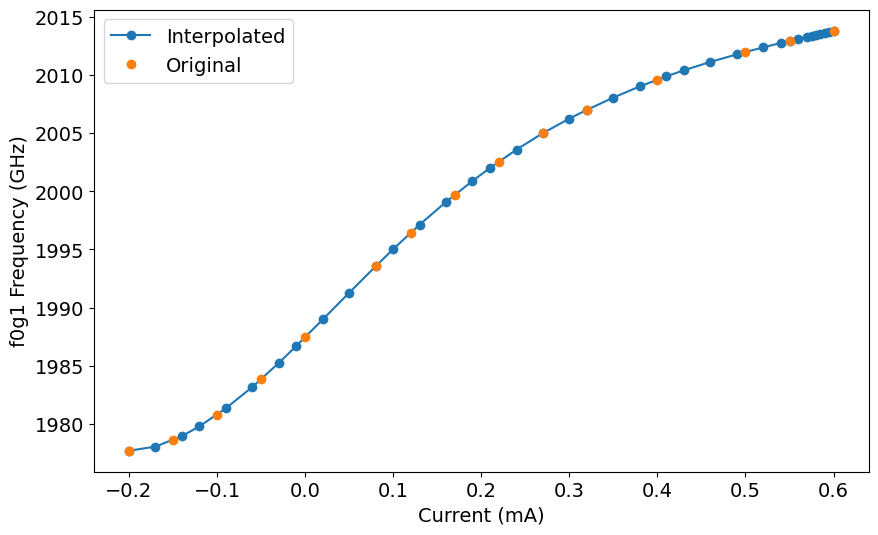

In [26]:
# compare interperted data with original data
# plt.plot(df['currents'], df['f0g1_freqs'], 'o', label='Original')
plt.plot(interp_df['currents'], interp_df['f0g1_freqs'], 'o-', label='Interpolated')
plt.plot(df['currents'], df['f0g1_freqs'], 'o', label='Original')
plt.xlabel('Current (mA)')
plt.ylabel('f0g1 Frequency (GHz)')
plt.legend()


Text(0, 0.5, 'Pi Pulse Length (us)')

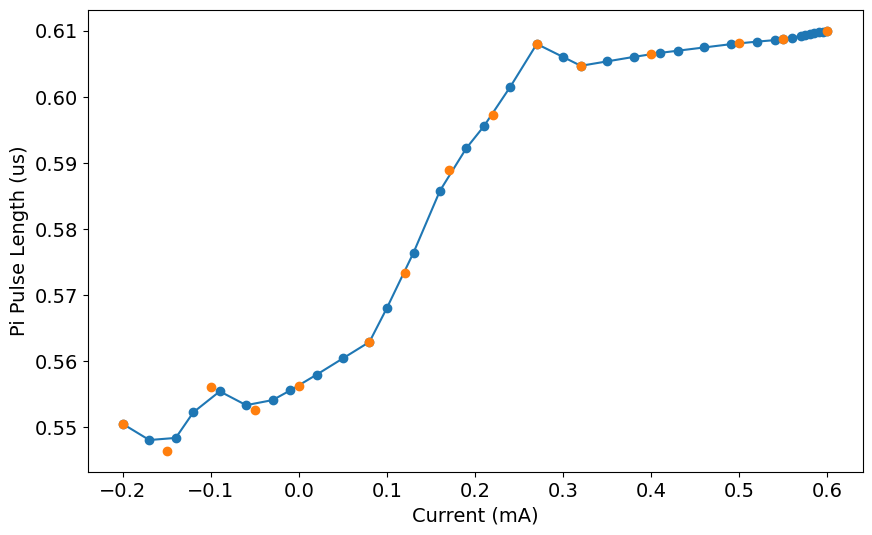

In [27]:
# compare interperted data with original data
# plt.plot(df['currents'], df['pi_lengths'], 'o', label='Original')
plt.plot(interp_df['currents'], interp_df['pi_lengths'], 'o-', label='Interpolated')
plt.plot(df['currents'], df['pi_lengths'], 'o', label='Original')
plt.xlabel('Current (mA)')
plt.ylabel('Pi Pulse Length (us)')

## Manipulate 1 T1 data

In [68]:
DC_flux_list = [-0.2 , -0.17, -0.14, -0.12, -0.09, -0.06, -0.03, -0.01,  0.02,
        0.05,  0.08,  0.1 ,  0.13,  0.16,  0.19,  0.21,  0.24,  0.27,
        0.3 ,  0.32,  0.35,  0.38,  0.41,  0.43,  0.46,  0.49,  0.52,
        0.54,  0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ]
data_file_list = [8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62, 65,68,71,74,77, 79]
name = '_cavity_t1_dc_flux_sweep_new.h5'
T1_list = []
T1_err_list = []
for ii in data_file_list:
        full_name = str(ii).zfill(5)+name
        try:
                temp_data, attrs = prev_data(expt_path, full_name) 
                temp_data['fit_avgi'], temp_data['fit_err_avgi'] = fitter.fitexp(temp_data['xpts'][:-1], temp_data['avgi'][:-1], fitparams=None)
                T1_list.append(temp_data['fit_avgi'][-1])
                T1_err_list.append(np.sqrt(temp_data['fit_err_avgi'][3][3]))
        except FileNotFoundError:
                print(f'File {full_name} not found')
                continue

C:\_Lib\python\multimode_expts\experiments\fitting.py:55: RuntimeWarning: overflow encountered in exp
  return y0 + yscale*np.exp(-(x-x0)/decay)


Text(0, 0.5, 'T1 (us)')

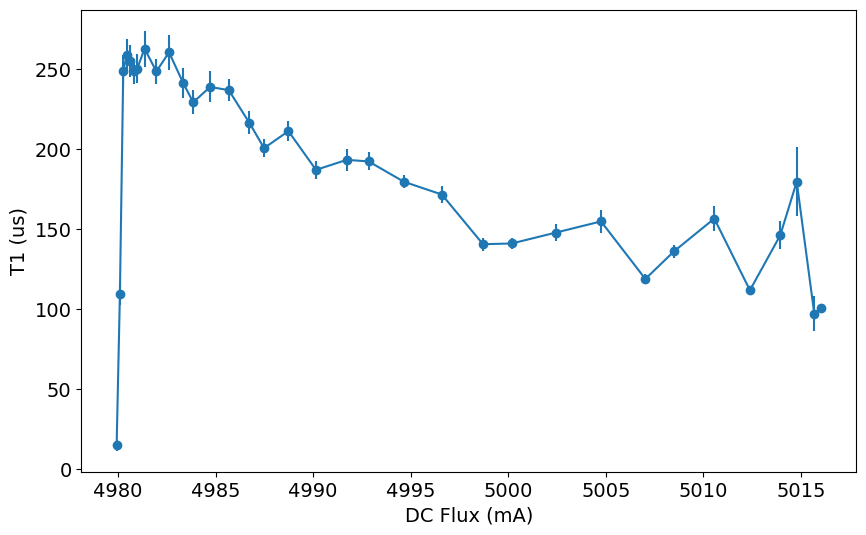

In [69]:
qubit_gf = yaml_cfg.device.qubit.f_ge[0] + yaml_cfg.device.qubit.f_ef[0]
xdata = qubit_gf - np.array(f0g1_interp_func(DC_flux_list))

plt.errorbar(xdata, T1_list, yerr=T1_err_list, fmt='o-')
plt.xlabel('DC Flux (mA)')
plt.ylabel('T1 (us)')

In [588]:
# raw data for t1 
DC_flux_list = [-0.2  , -0.17 , -0.14 , -0.12 , -0.09 , -0.06 , -0.03 , -0.01 ,
        0.02 ,  0.05 ,  0.08 ,  0.1  ,  0.13 ,  0.16 ,  0.19 ,  0.21 ,
        0.24 ,  0.27 ,  0.3  ,  0.32 ,  0.35 ,  0.38 ,  0.41 ,  0.43 ,
        0.46 ,  0.49 ,  0.52 ,  0.54 ,  0.55 ,  0.56 ,  0.57 ,  0.575,
        0.58 ,  0.585,  0.59 ,  0.595,  0.6  ]
data_file_list = [82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108,
                  110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136,
                  139, 142,145,148,151,154,157,160, 162]
file_names = []


name = '_cavity_t1_dc_flux_sweep_new.h5'
T1_list = []
T1_err_list = []
for ii in data_file_list:
        full_name = str(ii).zfill(5)+name
        try:
                temp_data, attrs = prev_data(expt_path, full_name) 
                temp_data['fit_avgi'], temp_data['fit_err_avgi'] = fitter.fitexp(temp_data['xpts'][:-1], temp_data['avgi'][:-1], fitparams=None)
                T1_list.append(temp_data['fit_avgi'][-1])
                T1_err_list.append(np.sqrt(temp_data['fit_err_avgi'][3][3]))
                file_names.append(full_name)
        except FileNotFoundError:
                print(f'File {full_name} not found')
                continue

Text(0.5, 1.0, 'Cache 1 T1 vs DC Flux')

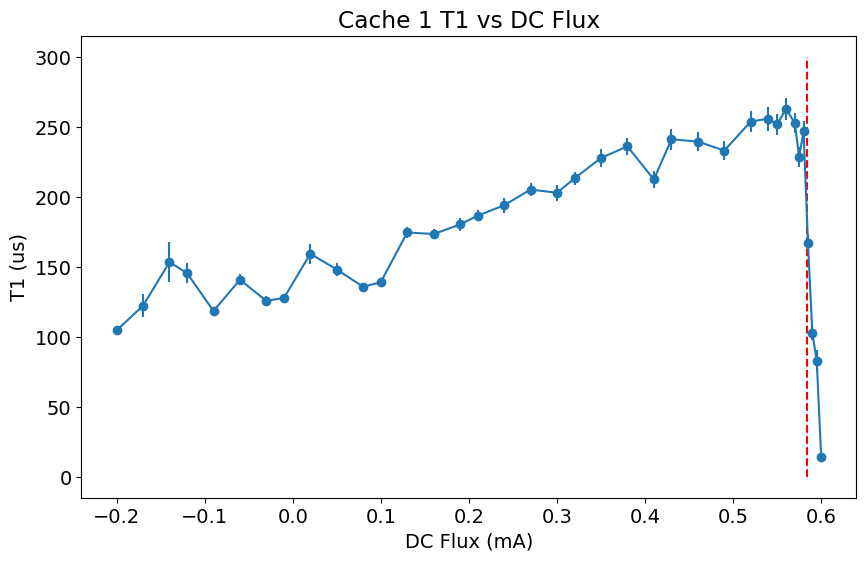

In [589]:
plt.errorbar(DC_flux_list, T1_list, yerr=T1_err_list, fmt='o-')
plt.vlines(0.584, 0, 300, colors='r', linestyles='dashed')
plt.xlabel('DC Flux (mA)')
plt.ylabel('T1 (us)')
plt.title('Cache 1 T1 vs DC Flux')

#### Collecting T1 Data in dataframe

##### Make new Df

In [605]:
man_t1_df = pd.DataFrame({'currents': DC_flux_list, 'T1': T1_list, 'T1_err': T1_err_list, 'file_name': file_names})
man_t1_df

# current = 0.58
# T1 = 100
# T1_err = 10
# gain = 5000
# freq = 1000
# file_name = '00016_SidebandT1GeneralExperiment.h5'

# # Add data to the DataFrame
# coup_t1_df.loc[len(coup_t1_df)] = [current, T1, T1_err, gain, freq, file_name]

# # Display the updated DataFrame
# coup_t1_df


,currents,T1,T1_err,file_name
0,-0.200,104.538594,1.630250,00082_cavity_t1_dc_flux_sweep_new.h5
1,-0.170,122.208819,8.383097,00084_cavity_t1_dc_flux_sweep_new.h5
2,-0.140,153.286526,14.069547,00086_cavity_t1_dc_flux_sweep_new.h5
3,-0.120,145.410579,7.097924,00088_cavity_t1_dc_flux_sweep_new.h5
4,-0.090,118.409589,2.361209,00090_cavity_t1_dc_flux_sweep_new.h5
5,-0.060,140.647633,3.925063,00092_cavity_t1_dc_flux_sweep_new.h5
6,-0.030,125.638037,3.455814,00094_cavity_t1_dc_flux_sweep_new.h5
7,-0.010,127.754302,2.214225,00096_cavity_t1_dc_flux_sweep_new.h5
8,0.020,159.247814,6.985906,00098_cavity_t1_dc_flux_sweep_new.h5
9,0.050,147.987348,4.555701,00100_cavity_t1_dc_flux_sweep_new.h5


##### Save Df

In [606]:
# save in dataframe 
# Assuming df is your DataFrame and parent_path is defined
folder = os.path.join(data_parent_path, 'RAM_paper_results', 'datasets')
file_name = 'ManT1.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Save the DataFrame to a CSV file
man_t1_df.to_csv(file_path, index=False)

print(f"DataFrame saved to {file_path}")

DataFrame saved to h:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets\ManT1.csv


In [607]:
man_t1_df

,currents,T1,T1_err,file_name
0,-0.200,104.538594,1.630250,00082_cavity_t1_dc_flux_sweep_new.h5
1,-0.170,122.208819,8.383097,00084_cavity_t1_dc_flux_sweep_new.h5
2,-0.140,153.286526,14.069547,00086_cavity_t1_dc_flux_sweep_new.h5
3,-0.120,145.410579,7.097924,00088_cavity_t1_dc_flux_sweep_new.h5
4,-0.090,118.409589,2.361209,00090_cavity_t1_dc_flux_sweep_new.h5
5,-0.060,140.647633,3.925063,00092_cavity_t1_dc_flux_sweep_new.h5
6,-0.030,125.638037,3.455814,00094_cavity_t1_dc_flux_sweep_new.h5
7,-0.010,127.754302,2.214225,00096_cavity_t1_dc_flux_sweep_new.h5
8,0.020,159.247814,6.985906,00098_cavity_t1_dc_flux_sweep_new.h5
9,0.050,147.987348,4.555701,00100_cavity_t1_dc_flux_sweep_new.h5


# Coupler DC Flux Scan

## Single scans

Found peak in amps at [MHz] 1434.7716470340026, HWHM 0.6778405635359024
Found peak in I at [MHz] 1434.6869802500053, HWHM -1.0084523218920862
Found peak in Q at [MHz] 1434.815881378005, HWHM -0.8487465328750511


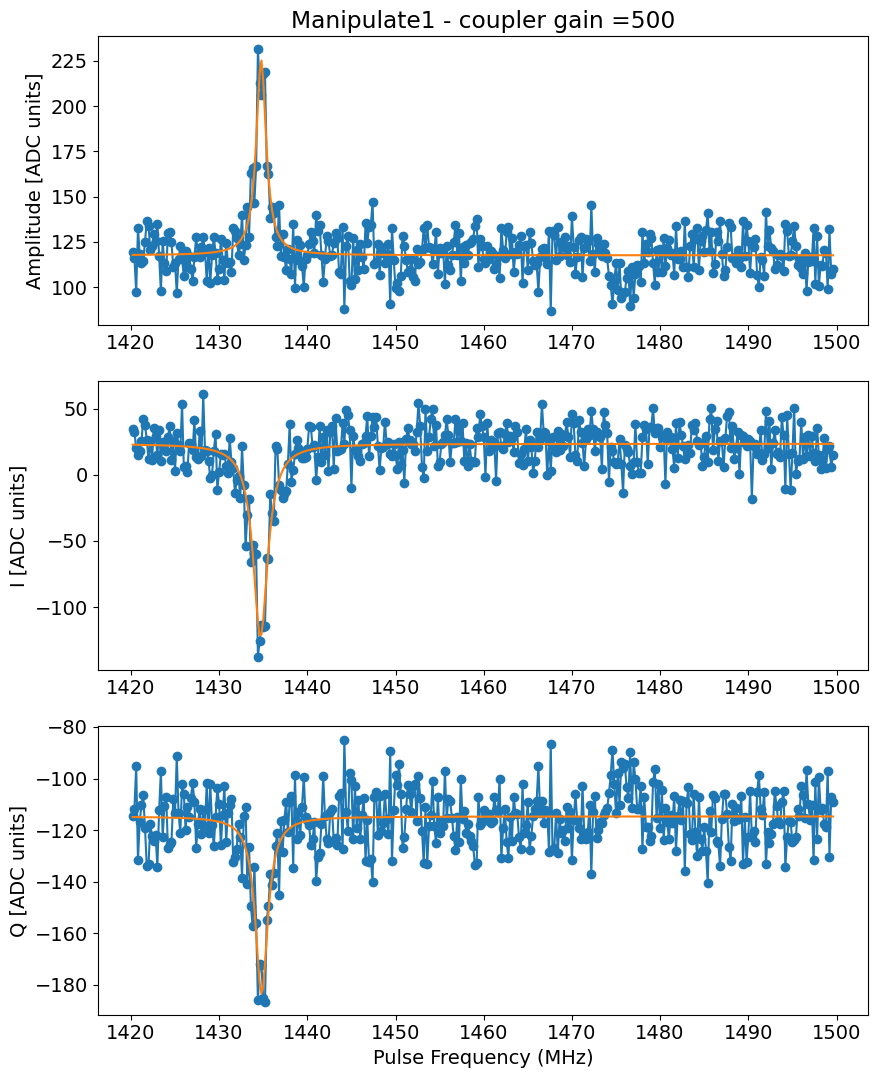

In [391]:
temp_data, attrs = prev_data(expt_path, '00050_FluxSpectroscopyF0g1Experiment.h5')
# temp_data, attrs = prev_data(expt_path, '00012_fluxspectroscopy_f0g1_dc_flux_sweep.h5')

qubit_spectroscopy_display(temp_data, title='Manipulate1 - coupler gain =' + str(attrs['config']['expt']['flux_drive'][2]), vlines=None)


In [336]:
attrs

{'config': {'prepulse_qubit': {'freq': [3568.1751638611518],
   'length': [0.06],
   'gain': [30],
   'phase': [0],
   'repeat_time': 10},
  'device': {'qubit': {'T1': [127.0],
    'f_ge': [3568.1751638611518],
    'f_ge_resolved': [3568.1751638611518],
    'f_ge_idle': [3568.1751638611518],
    'f_ef': [3425.5564066067],
    'f_ef_idle': [3425.5564066067],
    'ramp_sigma': [0.005],
    'ramp_sigma_num': [3],
    'pulses': {'pi_ge': {'gain': [10716],
      'sigma': [0.035],
      'length': [0],
      'type': ['gauss']},
     'pi_ge_ftop': {'gain': [3000],
      'sigma': [0.005],
      'length': [0.190914187445986],
      'type': ['flat_top']},
     'pi_ge_fast': {'gain': [10682],
      'sigma': [0.035],
      'length': [0],
      'type': ['gauss']},
     'pi_ge_resolved': {'gain': [50],
      'sigma': [0.005],
      'length': [6.553697146578866],
      'type': ['flat_top'],
      'repeat_no': [1]},
     'hpi_ge': {'gain': [5510],
      'length': [0],
      'sigma': [0.035],
      'typ

In [332]:
f0g1_interp_func(0.58)

array(2013.46108006)

In [1051]:
attrs

{'config': {'prepulse_qubit': {'freq': [3568.1751638611518],
   'length': [0.06],
   'gain': [30],
   'phase': [0],
   'repeat_time': 10},
  'device': {'qubit': {'T1': [127.0],
    'f_ge': [3568.1751638611518],
    'f_ge_resolved': [3568.1751638611518],
    'f_ge_idle': [3568.1751638611518],
    'f_ef': [3425.5564066067],
    'f_ef_idle': [3425.5564066067],
    'ramp_sigma': [0.005],
    'ramp_sigma_num': [3],
    'pulses': {'pi_ge': {'gain': [10716],
      'sigma': [0.035],
      'length': [0],
      'type': ['gauss']},
     'pi_ge_ftop': {'gain': [3000],
      'sigma': [0.005],
      'length': [0.190914187445986],
      'type': ['flat_top']},
     'pi_ge_fast': {'gain': [10682],
      'sigma': [0.035],
      'length': [0],
      'type': ['gauss']},
     'pi_ge_resolved': {'gain': [50],
      'sigma': [0.005],
      'length': [6.553697146578866],
      'type': ['flat_top'],
      'repeat_no': [1]},
     'hpi_ge': {'gain': [5510],
      'length': [0],
      'sigma': [0.035],
      'typ

In [268]:
f0g1_interp_func(0.576)

array(2013.3919327)

## Sweep

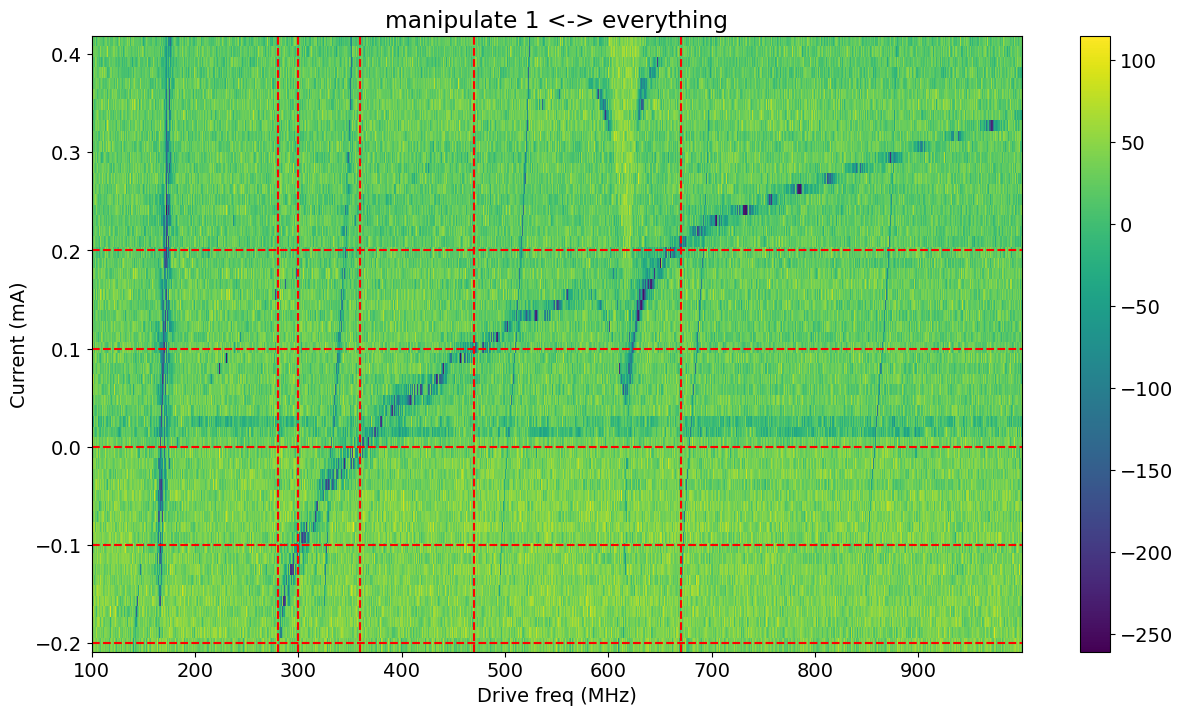

In [573]:
file_list = np.arange(7,67,1)
y_list = []
freq_list = []
name = '_fluxspectroscopy_f0g1_dc_flux_sweep.h5'
for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    try: 
        temp_data, attrs = prev_data(expt_path, full_name)  # ef
        signal_y = temp_data['avgi']
        len_x = temp_data['xpts']
        y_list.append(signal_y)
        freq_list.append(attrs['config']['expt']['current'])
    except FileNotFoundError:
        print(f'File {full_name} not found')
        continue

plot_f0g1_sweep(len_x, freq_list, np.array(y_list), hlines=[-0.2, -0.1, 0, 0.1, 0.2], vlines=[280, 300, 360, 470, 670], title="manipulate 1 <-> everything")

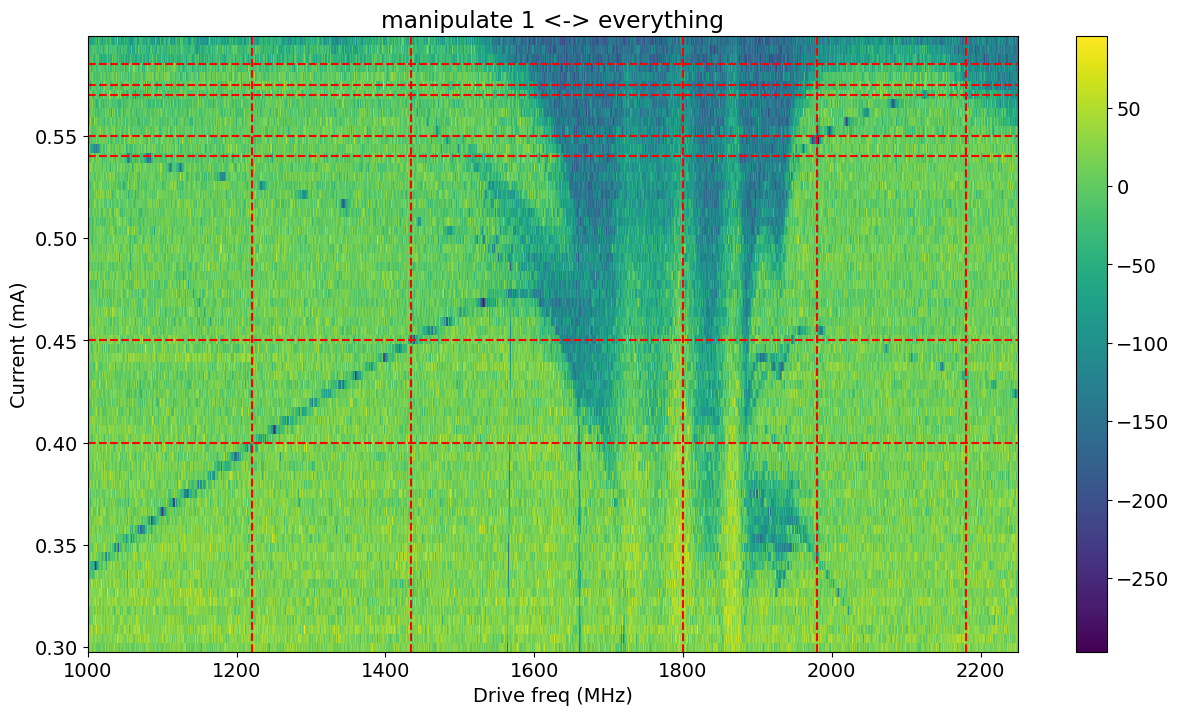

In [35]:
file_list = np.arange(67,135,1)
y_list = []
freq_list = []
name = '_fluxspectroscopy_f0g1_dc_flux_sweep.h5'
for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    try: 
        temp_data, attrs = prev_data(expt_path, full_name)  # ef
        signal_y = temp_data['avgi']
        len_x = temp_data['xpts']
        y_list.append(signal_y)
        freq_list.append(attrs['config']['expt']['current'])
    except FileNotFoundError:
        print(f'File {full_name} not found')
        continue

plot_f0g1_sweep(len_x, freq_list, np.array(y_list), hlines=[0.4, 0.45, 0.55, 0.54, 0.57, 0.575, 0.585], vlines=[1220, 1435, 1980, 1800, 2180], title="manipulate 1 <-> everything")

Plotting mant1 as a func of dressed detuning

In [62]:
rough_currents = [0.33, 0.2,-0.2, -0.1, 0, 0.1, 0.4, 0.45, 0.55,]
rough_freqs = [971, 670, 280, 300, 360, 470, 1220, 1435, 1980]
# Combine the lists and sort by currents
combined = sorted(zip(rough_currents, rough_freqs))

# Unzip the combined list back into separate lists
rough_currents, rough_freqs = zip(*combined)

# Convert back to lists
rough_currents = list(rough_currents)
rough_freqs = list(rough_freqs)

# make a cubic spline interpolation
coupler_func = CubicSpline(rough_currents, rough_freqs)#, kind='linear', fill_value="extrapolate")

# raw data for t1 
DC_flux_list = [-0.2  , -0.17 , -0.14 , -0.12 , -0.09 , -0.06 , -0.03 , -0.01 ,
        0.02 ,  0.05 ,  0.08 ,  0.1  ,  0.13 ,  0.16 ,  0.19 ,  0.21 ,
        0.24 ,  0.27 ,  0.3  ,  0.32 ,  0.35 ,  0.38 ,  0.41 ,  0.43 ,
        0.46 ,  0.49 ,  0.52 ,  0.54 ,  0.55 ,  0.56 ,  0.57 ,  0.575,
        0.58 ,  0.585,  0.59 ,  0.595,  0.6  ]
data_file_list = [82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108,
                  110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136,
                  139, 142,145,148,151,154,157,160, 162]

# plot t1 data as a func of dressed detung 
qubit_gf = yaml_cfg.device.qubit.f_ge[0] + yaml_cfg.device.qubit.f_ef[0]
man_freq_list = qubit_gf - np.array(f0g1_interp_func(DC_flux_list))
coupler_freq_list = coupler_func(DC_flux_list)

dressed_detung_list = man_freq_list - coupler_freq_list

# getting y data 
name = '_cavity_t1_dc_flux_sweep_new.h5'
T1_list = []
T1_err_list = []
for ii in data_file_list:
        full_name = str(ii).zfill(5)+name
        try:
                temp_data, attrs = prev_data(expt_path, full_name) 
                temp_data['fit_avgi'], temp_data['fit_err_avgi'] = fitter.fitexp(temp_data['xpts'][:-1], temp_data['avgi'][:-1], fitparams=None)
                T1_list.append(temp_data['fit_avgi'][-1])
                T1_err_list.append(np.sqrt(temp_data['fit_err_avgi'][3][3]))
        except FileNotFoundError:
                print(f'File {full_name} not found')
                continue



In [63]:
f0g1_interp_func(0.585)
coupler_func(0.585)

array(2217.85652133)

In [64]:
dressed_detung_list

array([4736.03157047, 4734.43185655, 4728.10106399, 4721.4324497 ,
       4708.0273206 , 4690.83272473, 4670.13806228, 4654.55754357,
       4628.61677241, 4597.95278944, 4559.75378608, 4528.70469979,
       4472.95087718, 4409.78359536, 4343.97434853, 4300.93379961,
       4237.6924909 , 4172.07724397, 4099.5143969 , 4044.99191503,
       3950.92849062, 3842.69984828, 3723.2245599 , 3638.03651743,
       3500.68928762, 3350.05567803, 3184.10206569, 3063.95401808,
       3000.80157047, 2935.49696588, 2867.96529849, 2833.34090817,
       2798.13166247, 2762.32819814, 2725.92115197, 2688.90116073,
       2651.25886119])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


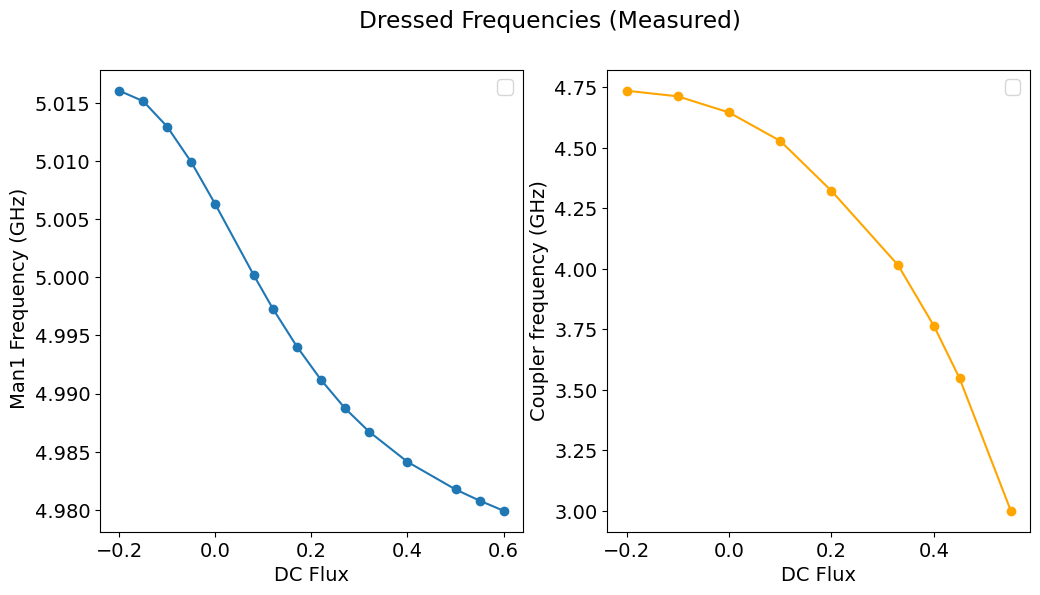

In [65]:
 #Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot f0g1_freqs vs DC_flux_list on the first axis
ax1.plot(df['currents'], (qubit_gf - df['f0g1_freqs']) * 1e-3, '-o')
ax1.set_xlabel('DC Flux')
ax1.set_ylabel(' Man1 Frequency (GHz)')
ax1.legend()

# Plot pi_lengths vs DC_flux_list on the second axis
ax2.plot(rough_currents, (qubit_gf - (f0g1_interp_func(rough_currents)) -rough_freqs) * 1e-3,'-o', color='orange')
ax2.set_xlabel('DC Flux')
ax2.set_ylabel('Coupler frequency (GHz)')
# ax2.set_title('pi_lengths vs DC Flux')
plt.suptitle('Dressed Frequencies (Measured)')
ax2.legend()
# plt.yscale('log')

Text(0.5, 1.0, 'Manipulate T1')

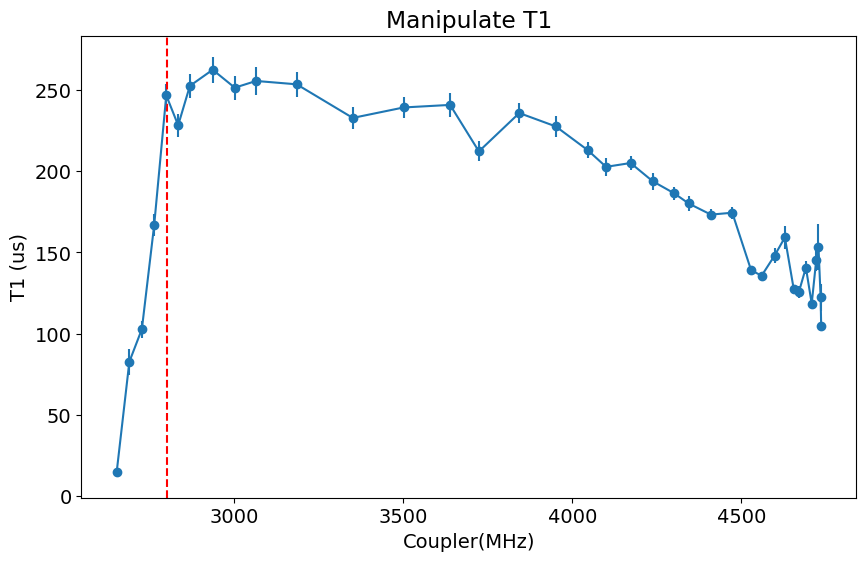

In [67]:
# plt.errorbar(DC_flux_list, T1_list, yerr=T1_err_list, fmt='o-')
plt.errorbar((qubit_gf - (f0g1_interp_func(DC_flux_list)) -coupler_func(DC_flux_list)), T1_list, yerr=T1_err_list, fmt='o-')
plt.axvline(x=2800, color='r', linestyle='--')
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('Coupler(MHz)')
plt.ylabel('T1 (us)')
plt.title('Manipulate T1')


In [1161]:
coupler_func(0.5825)
f0g1_interp_func(0.57)

array(2013.28729505)

# Coupler T1

## Sideband General Sweep

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


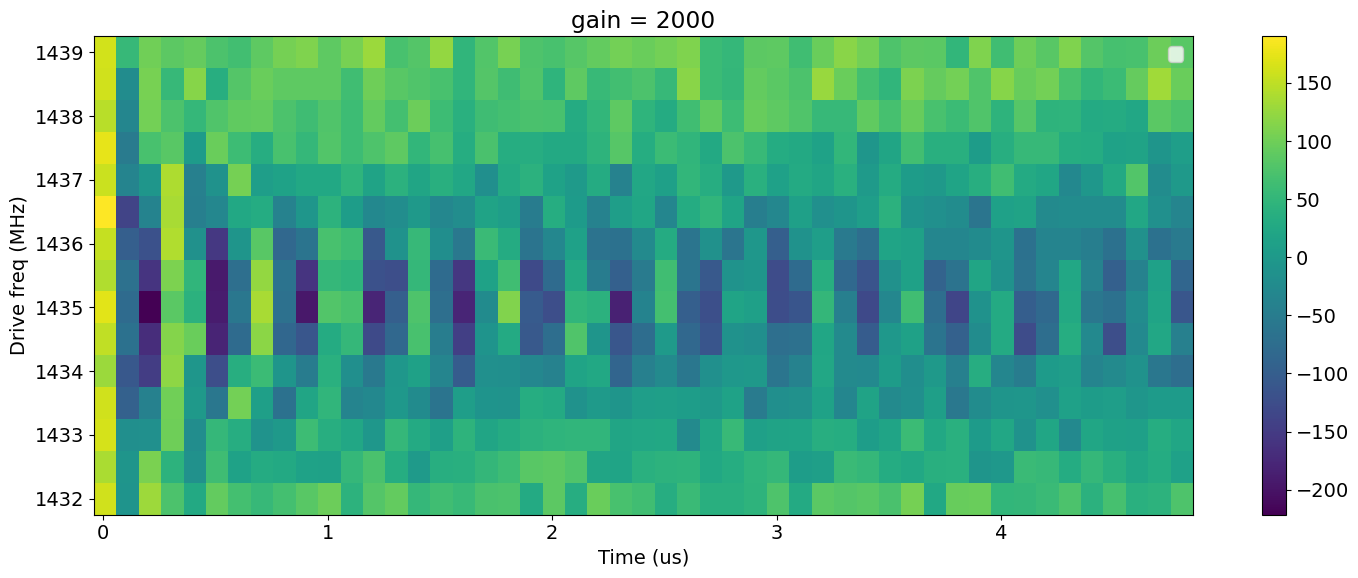

In [467]:

file_list = np.arange(875, 885, 1) # 0.571 ma
file_list = np.arange(904, 915, 1) # 0.572 ma
# file_list = np.arange(930, 945, 1) # 0.565 ma
file_list = np.arange(961, 969, 1) # 0.585 ma
file_list = np.arange(989, 1010, 1) # 0.585 ma   (969, 975 - 5000gain)
file_list = np.arange(1001, 1007, 1) # coupler drive off 
file_list = np.arange(1049, 1075, 1) # np.arange(1031, 1048, 1) #np.arange(1019, 1027, 1) #np.arange(1007, 1019, 1) # 0.58 ma
# file_list = np.arange(1115, 1150, 1)#np.arange(1107, 1114,1 )#np.arange(1095, 1107, 1)#np.arange(1076, 1095,1 )#file_list = np.arange(1060, 1076, 1) # 0.575
file_list = np.arange(1240, 1250,1 ) #np.arange(1226, 1240, 1)# file_list = np.arange(1204,1210,1) #np.arange(1193, 1220, 1) # 0.58
file_list = np.arange(1275, 1290, 1) # 0.45
y_list = []
freq_list = []
name = '_sideband_general_sweep.h5'
normalize = False


for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    try:
        temp_data, attrs = prev_data(expt_path, full_name)  # ef
        signal_y = temp_data['avgi'][0:-1]

        
        len_x = temp_data['xpts'][0:-1]
        y_list.append(signal_y)
        freq_list.append(attrs['config']['expt']['flux_drive'][1])
    except FileNotFoundError:
        print(f'File {full_name} not found')
        continue

plot_sideband_sweep(len_x, freq_list, np.array(y_list), hlines=[], vlines=None, normalize = normalize, title="gain = " + str(attrs['config']['expt']['flux_drive'][2]))

In [362]:
len(len_x)

49

In [360]:
freq_list

[2170.0, 2171.5, 2173.0, 2174.5, 2176.0, 2177.5]

In [361]:
np.shape(y_list)

(42, 49)

In [1201]:
attrs

{'config': {'prepulse_qubit': {'freq': [3568.1751638611518],
   'length': [0.06],
   'gain': [30],
   'phase': [0],
   'repeat_time': 10},
  'device': {'qubit': {'T1': [127.0],
    'f_ge': [3568.1751638611518],
    'f_ge_resolved': [3568.1751638611518],
    'f_ge_idle': [3568.1751638611518],
    'f_ef': [3425.5564066067],
    'f_ef_idle': [3425.5564066067],
    'ramp_sigma': [0.005],
    'ramp_sigma_num': [3],
    'pulses': {'pi_ge': {'gain': [10716],
      'sigma': [0.035],
      'length': [0],
      'type': ['gauss']},
     'pi_ge_ftop': {'gain': [3000],
      'sigma': [0.005],
      'length': [0.190914187445986],
      'type': ['flat_top']},
     'pi_ge_fast': {'gain': [10682],
      'sigma': [0.035],
      'length': [0],
      'type': ['gauss']},
     'pi_ge_resolved': {'gain': [50],
      'sigma': [0.005],
      'length': [6.553697146578866],
      'type': ['flat_top'],
      'repeat_no': [1]},
     'hpi_ge': {'gain': [5510],
      'length': [0],
      'sigma': [0.035],
      'typ

In [640]:
g = 80 
delta = 1300
alpha = 80 
(g/delta)**2 * alpha

0.30295857988165686

In [689]:
T1_meas = 100
T1_pure = 250
Tq = 50 
delta = 300

g = np.sqrt(Tq * ((1/T1_meas) - (1/T1_pure))) * delta
g

164.31676725154983

### Sideband General 

[227.39457689   2.85027588  93.16053717   3.44864267 -33.94715773
  -0.47248632]
Decay from avgi [us] 3.448642672581644
Rate [MHz] 2.8502758777103683
Pi length from avgi data [us]: 0.17234146839057687
	Pi/2 length from avgi data [us]: 0.08463066048070345
Fit params:  [227.39457689   2.85027588  93.16053717   3.44864267 -33.94715773
  -0.47248632]

Decay from avgq [us] 1.9590545191211164
Rate [MHz] 2.85143955078079
Pi length from avgq data [us]: 0.1718321861675831
Pi/2 length from avgq data [us]: 0.08591609308379156
Fit params:  [188.58375649   2.85143955  93.61112698   1.95905452 -87.03160842
  -0.473     ]


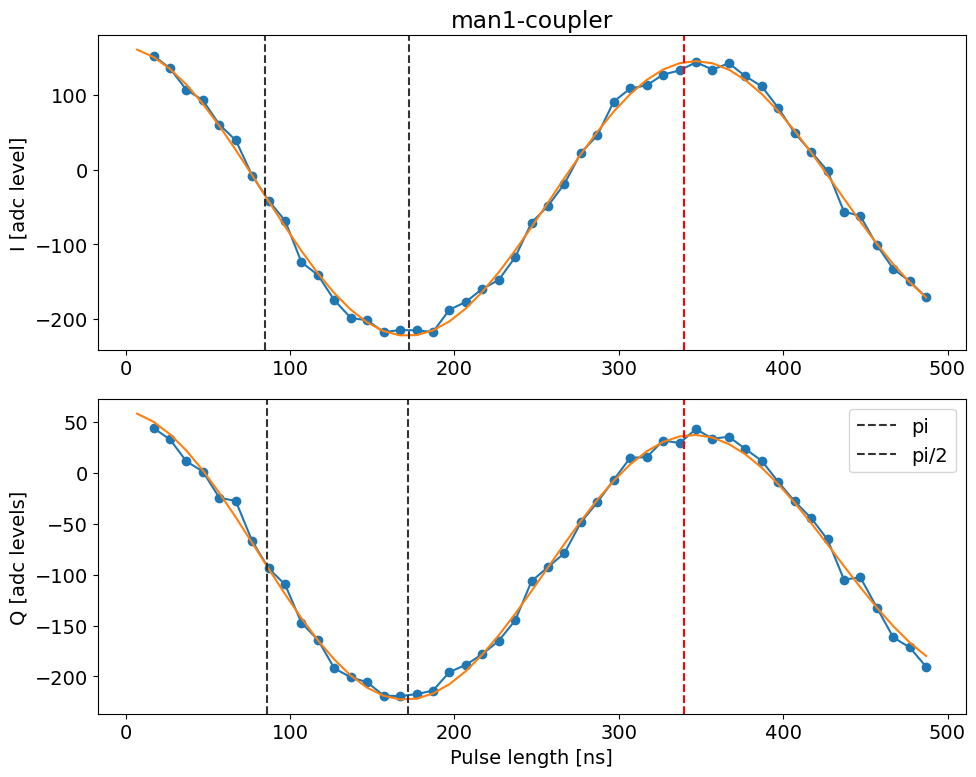

In [468]:

temp_data, attrs = prev_data(expt_path, '00017_SidebandGeneralExperiment.h5')  #
Ilist2 = length_rabi_display(temp_data, fit=True, fitparams=[None, None,None,None,None,None ],
                              vlines = [340],
                      normalize= [False, 'g_data', 'f_data'],
                       active_reset = False,  title='man1-coupler')

In [1000]:
attrs

{'config': {'prepulse_qubit': {'freq': [3568.1751638611518],
   'length': [0.06],
   'gain': [30],
   'phase': [0],
   'repeat_time': 10},
  'device': {'qubit': {'T1': [127.0],
    'f_ge': [3568.1751638611518],
    'f_ge_resolved': [3568.1751638611518],
    'f_ge_idle': [3568.1751638611518],
    'f_ef': [3425.5564066067],
    'f_ef_idle': [3425.5564066067],
    'ramp_sigma': [0.005],
    'ramp_sigma_num': [3],
    'pulses': {'pi_ge': {'gain': [10716],
      'sigma': [0.035],
      'length': [0],
      'type': ['gauss']},
     'pi_ge_ftop': {'gain': [3000],
      'sigma': [0.005],
      'length': [0.190914187445986],
      'type': ['flat_top']},
     'pi_ge_fast': {'gain': [10682],
      'sigma': [0.035],
      'length': [0],
      'type': ['gauss']},
     'pi_ge_resolved': {'gain': [50],
      'sigma': [0.005],
      'length': [6.553697146578866],
      'type': ['flat_top'],
      'repeat_no': [1]},
     'hpi_ge': {'gain': [5510],
      'length': [0],
      'sigma': [0.035],
      'typ

### Coupler T1

Fit T1 avgi [us]: 29.011007562047343
Fit T1 avgq [us]: 28.81690427027548


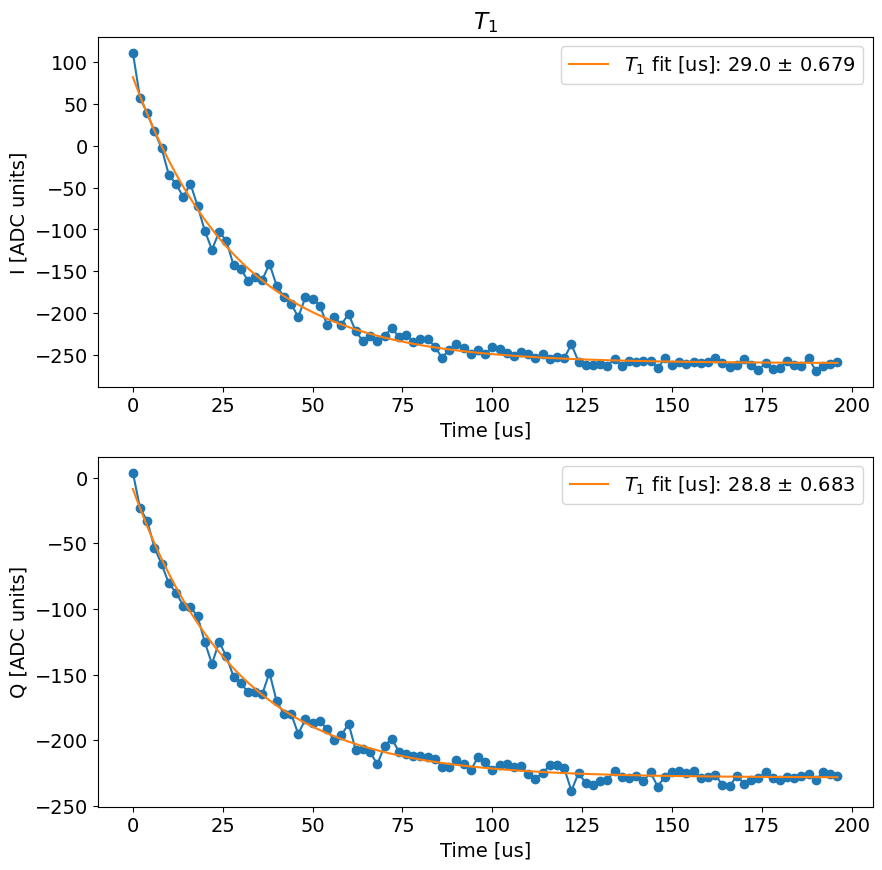

(28.81690427027548, 0.6832094167553298)

In [419]:

temp_data, attrs = prev_data(expt_path, '00014_SidebandT1GeneralExperiment.h5')
t1_display(data = temp_data, attrs = attrs, fit = True, active_reset = False)


#### Collecting T1 Data in dataframe

##### Make new Df

In [479]:
coup_t1_df = pd.DataFrame({'currents': {}, 'T1': {}, 'T1_err': {}, 'gain': {}, 'freq': {}, 'pi_length': {}, 'file_name': {}})
coup_t1_df

# current = 0.58
# T1 = 100
# T1_err = 10
# gain = 5000
# freq = 1000
# file_name = '00016_SidebandT1GeneralExperiment.h5'

# # Add data to the DataFrame
# coup_t1_df.loc[len(coup_t1_df)] = [current, T1, T1_err, gain, freq, file_name]

# # Display the updated DataFrame
# coup_t1_df


,currents,T1,T1_err,gain,freq,pi_length,file_name


##### Add data to Df`

Fit T1 avgi [us]: 50.169594082310496
Fit T1 avgq [us]: 48.507968775534366


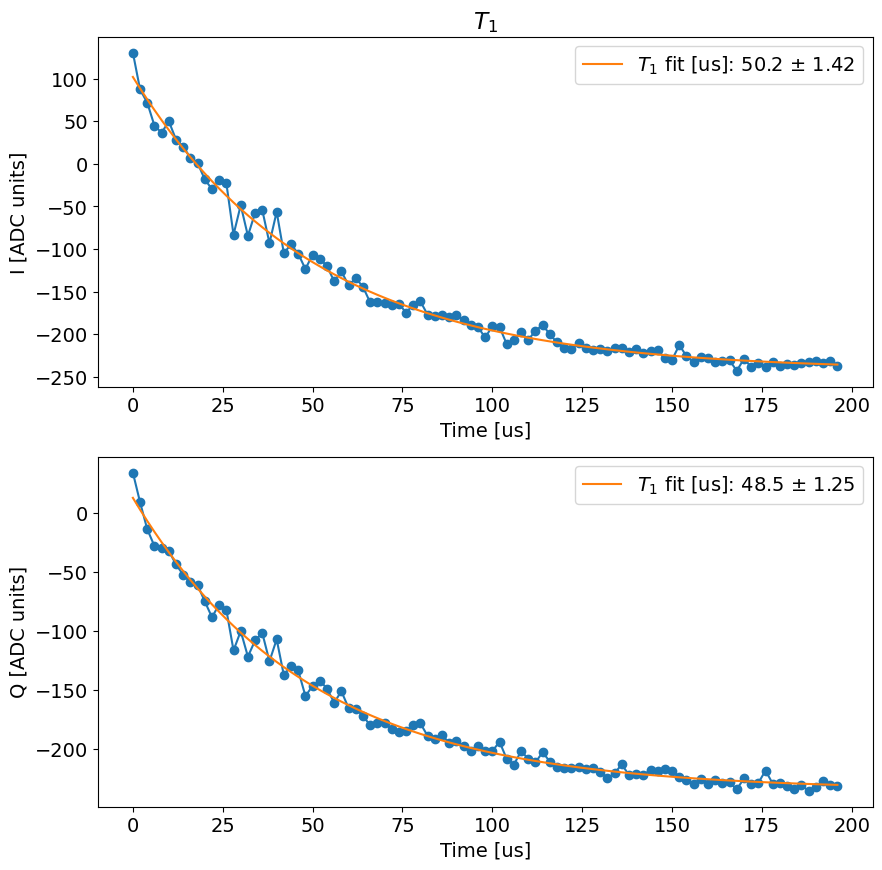

In [504]:
file_name = '00018_SidebandT1GeneralExperiment.h5'
temp_data, attrs = prev_data(expt_path, file_name)
t1, t1_err = t1_display(data = temp_data, attrs = attrs, fit = True, active_reset = False)

In [505]:
current = 0.45
T1 = t1
T1_err = t1_err
gain = attrs['config']['expt']['post_sweep_pulse'][1][0]
freq = attrs['config']['expt']['post_sweep_pulse'][0][0]
pi_length = attrs['config']['expt']['post_sweep_pulse'][2][0]
file_name = file_name

# Add data to the DataFrame
coup_t1_df.loc[len(coup_t1_df)] = [current, T1, T1_err, gain, freq, pi_length, file_name]
coup_t1_df

,currents,T1,T1_err,gain,freq,pi_length,file_name
0,-0.200,49.238800,0.845183,5000,283.25,0.708320,00001_SidebandT1GeneralExperiment.h5
1,0.080,39.578980,0.955975,2500,440.05,0.227493,00002_SidebandT1GeneralExperiment.h5
2,0.320,44.660608,1.115768,1000,944.25,0.316678,00004_SidebandT1GeneralExperiment.h5
3,0.570,34.422176,0.903962,5000,2133.00,0.132573,00008_SidebandT1GeneralExperiment.h5
4,0.560,17.721954,0.416043,2175,2037.25,0.192170,00011_SidebandT1GeneralExperiment.h5
5,0.571,37.036378,0.886530,5000,2142.00,0.137518,00013_SidebandT1GeneralExperiment.h5
6,0.565,28.816904,0.683209,3500,2073.50,0.160224,00014_SidebandT1GeneralExperiment.h5
7,0.576,16.632814,0.672637,2500,2155.00,0.284826,00015_SidebandT1GeneralExperiment.h5
8,0.580,12.426012,1.142225,1500,2182.00,0.362594,00016_SidebandT1GeneralExperiment.h5
9,0.450,48.507969,1.249782,2000,1435.00,0.172341,00018_SidebandT1GeneralExperiment.h5


In [595]:
coup_t1_df

,currents,T1,T1_err,gain,freq,pi_length,file_name
0,-0.200,49.238800,0.845183,5000,283.25,0.708320,00001_SidebandT1GeneralExperiment.h5
1,0.080,39.578980,0.955975,2500,440.05,0.227493,00002_SidebandT1GeneralExperiment.h5
2,0.320,44.660608,1.115768,1000,944.25,0.316678,00004_SidebandT1GeneralExperiment.h5
3,0.570,34.422176,0.903962,5000,2133.00,0.132573,00008_SidebandT1GeneralExperiment.h5
4,0.560,17.721954,0.416043,2175,2037.25,0.192170,00011_SidebandT1GeneralExperiment.h5
5,0.571,37.036378,0.886530,5000,2142.00,0.137518,00013_SidebandT1GeneralExperiment.h5
6,0.565,28.816904,0.683209,3500,2073.50,0.160224,00014_SidebandT1GeneralExperiment.h5
7,0.576,16.632814,0.672637,2500,2155.00,0.284826,00015_SidebandT1GeneralExperiment.h5
8,0.580,12.426012,1.142225,1500,2182.00,0.362594,00016_SidebandT1GeneralExperiment.h5
9,0.450,48.507969,1.249782,2000,1435.00,0.172341,00018_SidebandT1GeneralExperiment.h5


##### Save Df

In [596]:
# save in dataframe 
# Assuming df is your DataFrame and parent_path is defined
folder = os.path.join(data_parent_path, 'RAM_paper_results', 'datasets')
file_name = 'CouplerT1.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Save the DataFrame to a CSV file
coup_t1_df.to_csv(file_path, index=False)

print(f"DataFrame saved to {file_path}")

DataFrame saved to h:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets\CouplerT1.csv


In [458]:
# delete 6th row of df 
coup_t1_df = coup_t1_df.drop([6])

In [1005]:
10/((0.08/3)**2)

14062.499999999996

In [1006]:
attrs

{'config': {'prepulse_qubit': {'freq': [3568.1751638611518],
   'length': [0.06],
   'gain': [30],
   'phase': [0],
   'repeat_time': 10},
  'device': {'qubit': {'T1': [127.0],
    'f_ge': [3568.1751638611518],
    'f_ge_resolved': [3568.1751638611518],
    'f_ge_idle': [3568.1751638611518],
    'f_ef': [3425.5564066067],
    'f_ef_idle': [3425.5564066067],
    'ramp_sigma': [0.005],
    'ramp_sigma_num': [3],
    'pulses': {'pi_ge': {'gain': [10716],
      'sigma': [0.035],
      'length': [0],
      'type': ['gauss']},
     'pi_ge_ftop': {'gain': [3000],
      'sigma': [0.005],
      'length': [0.190914187445986],
      'type': ['flat_top']},
     'pi_ge_fast': {'gain': [10682],
      'sigma': [0.035],
      'length': [0],
      'type': ['gauss']},
     'pi_ge_resolved': {'gain': [50],
      'sigma': [0.005],
      'length': [6.553697146578866],
      'type': ['flat_top'],
      'repeat_no': [1]},
     'hpi_ge': {'gain': [5510],
      'length': [0],
      'sigma': [0.035],
      'typ

#### Prepulse manipulation

In [390]:
f0g1_interp_func(0.45)

array(2010.88406296)

In [389]:
coupler_func(0.45)

array(1435.)

In [510]:
f0g1 = 2010.88406296
coup = 1435




f0g1_length = 0.607
coup_length = 0.17234146839057687
coup_gain = 2000

In [511]:
# for sideband/spec experiment 
from MM_base import *
basee = MM_base(yaml_cfg)
prepulse_str = [['qubit', 'ge', 'hpi',0], 
                 ['qubit',  'ef', 'pi', 0],
                ['man', 'M1', 'pi',  0],
                ]
post_pulse_str = [
                  ['man', 'M1', 'pi', 0],
                  ['qubit',  'ef', 'pi', 0],
                ['qubit', 'ge', 'hpi',0]
                ]
creator = basee.get_prepulse_creator(prepulse_str)
post_creator = basee.get_prepulse_creator(post_pulse_str)

pre_sweep_pulse = creator.pulse.tolist()
# change f0g1 freq, length and coupler sidebandfreq and length
pre_sweep_pulse[0][-1] = f0g1
# pre_sweep_pulse[0][-1] = coup
pre_sweep_pulse[2][-1] = f0g1_length
# pre_sweep_pulse[2][-1] = coup_length

# do same for postpulse 
post_sweep_pulse = post_creator.pulse.tolist()
# post_sweep_pulse[0][0] = coup
# post_sweep_pulse[2][0] = coup_length
post_sweep_pulse[0][0] = f0g1
post_sweep_pulse[2][0] = f0g1_length

# return 
print('pre_sweep_pulse:', pre_sweep_pulse)
print('post_sweep_pulse:', post_sweep_pulse)

pre_sweep_pulse: [[3568.1751638611518, 3425.5564066067, 2010.88406296], [5510, 8236, 15000], [0, 0, 0.607], [0, 0, 0], [2, 2, 0], ['g', 'g', 'flat_top'], [0.035, 0.035, 0.005]]
post_sweep_pulse: [[2010.88406296, 3425.5564066067, 3568.1751638611518], [15000, 8236, 5510], [0.607, 0, 0], [0, 0, 0], [0, 2, 2], ['flat_top', 'g', 'g'], [0.005, 0.035, 0.035]]


In [512]:
coupler_func(0.56)

array(2045.12426456)

In [513]:
# for sideband t1 experiment
basee = MM_base(yaml_cfg)
prepulse_str = [['qubit', 'ge', 'pi',0], 
                 ['qubit',  'ef', 'pi', 0],
                ['man', 'M1', 'pi',  0],
                ['storage', 'M1-S5', 'pi', 0 ]]
post_pulse_str = [['storage', 'M1-S5', 'pi', 0], 
                  ['man', 'M1', 'pi', 0]]
creator = basee.get_prepulse_creator(prepulse_str)
post_creator = basee.get_prepulse_creator(post_pulse_str)

pre_sweep_pulse = creator.pulse.tolist()
# change f0g1 freq, length and coupler sidebandfreq and length
pre_sweep_pulse[0][-2] = f0g1
pre_sweep_pulse[0][-1] = coup
pre_sweep_pulse[2][-2] = f0g1_length
pre_sweep_pulse[2][-1] = coup_length
pre_sweep_pulse[1][-1] = coup_gain

# do same for postpulse 
post_sweep_pulse = post_creator.pulse.tolist()
post_sweep_pulse[0][0] = coup
post_sweep_pulse[2][0] = coup_length
post_sweep_pulse[1][0] = coup_gain
post_sweep_pulse[0][1] = f0g1
post_sweep_pulse[2][1] = f0g1_length

# return 
print('pre_sweep_pulse:', pre_sweep_pulse)
print('post_sweep_pulse:', post_sweep_pulse)

pre_sweep_pulse: [[3568.1751638611518, 3425.5564066067, 2010.88406296, 1435], [10716, 8236, 15000, 2000], [0, 0, 0.607, 0.17234146839057687], [0, 0, 0, 0], [2, 2, 0, 3], ['g', 'g', 'flat_top', 'flat_top'], [0.035, 0.035, 0.005, 0.005]]
post_sweep_pulse: [[1435, 2010.88406296], [2000, 15000], [0.17234146839057687, 0.607], [0, 0], [3, 0], ['flat_top', 'flat_top'], [0.005, 0.005]]


In [514]:
# for ramsey experiment
basee = MM_base(yaml_cfg)
prepulse_str = [
                ['storage', 'M1-S5', 'pi', 0 ]]
post_pulse_str = [['storage', 'M1-S5', 'pi', 0], 
                  ]
creator = basee.get_prepulse_creator(prepulse_str)
post_creator = basee.get_prepulse_creator(post_pulse_str)

pre_sweep_pulse = creator.pulse.tolist()
# change f0g1 freq, length and coupler sidebandfreq and length
# pre_sweep_pulse[0][-2] = f0g1
pre_sweep_pulse[0][-1] = coup
# pre_sweep_pulse[2][-2] = f0g1_length
pre_sweep_pulse[2][-1] = coup_length
pre_sweep_pulse[1][-1] = coup_gain

# do same for postpulse 
# post_sweep_pulse = post_creator.pulse.tolist()
# post_sweep_pulse[0][0] = coup
# post_sweep_pulse[2][0] = coup_length
# post_sweep_pulse[1][0] = coup_gain
# post_sweep_pulse[0][1] = f0g1
# post_sweep_pulse[2][1] = f0g1_length

# return 
print('pre_sweep_pulse:', pre_sweep_pulse)
# print('post_sweep_pulse:', post_sweep_pulse)

pre_sweep_pulse: [[1435], [2000], [0.17234146839057687], [0], [3], ['flat_top'], [0.005]]


In [504]:
creator.pulse.tolist()

[[3568.1751638611518, 3425.5564066067, 2007.06, 349.415],
 [10716, 8236, 15000, 3000],
 [0, 0, 0.651287, 0.9771428571428572],
 [0, 0, 0, 0],
 [2, 2, 0, 1],
 ['g', 'g', 'flat_top', 'flat_top'],
 [0.035, 0.035, 0.005, 0.005]]

In [501]:
yaml_cfg

{'prepulse_qubit': {'freq': [3568.1751638611518],
  'length': [0.06],
  'gain': [30],
  'phase': [0],
  'repeat_time': 10},
 'device': {'qubit': {'T1': [127.0],
   'f_ge': [3568.1751638611518],
   'f_ge_resolved': [3568.1751638611518],
   'f_ge_idle': [3568.1751638611518],
   'f_ef': [3425.5564066067],
   'f_ef_idle': [3425.5564066067],
   'ramp_sigma': [0.005],
   'ramp_sigma_num': [3],
   'pulses': {'pi_ge': {'gain': [10716],
     'sigma': [0.035],
     'length': [0],
     'type': 'gauss'},
    'pi_ge_ftop': {'gain': [3000],
     'sigma': [0.005],
     'length': [0.190914187445986],
     'type': 'flat_top'},
    'pi_ge_fast': {'gain': [10682],
     'sigma': [0.035],
     'length': [0],
     'type': 'gauss'},
    'pi_ge_resolved': {'gain': [50],
     'sigma': [0.005],
     'length': [6.553697146578866],
     'type': 'flat_top',
     'repeat_no': 1},
    'hpi_ge': {'gain': [5510],
     'length': [0],
     'sigma': [0.035],
     'type': 'gauss'},
    'hpi_ge_ftop': {'gain': [3000],
    

# Coupler T2

Current pi pulse frequency: 1977.7
Fit frequency from I [MHz]: 17.948330208416355 +/- 0.10169187245033165
Suggested new pi pulse frequency from fit I [MHz]:
 	1979.7516697915837
 	2015.6483302084164
T2 Ramsey from fit I [us]: 0.21359651175814287
Fit frequency from Q [MHz]: 19.07358186996984 +/- 0.5016220698198425
Suggested new pi pulse frequencies from fit Q [MHz]:
 	1978.6264181300303
 	2016.7735818699698
T2 Ramsey from fit Q [us]: 0.14778305228348623


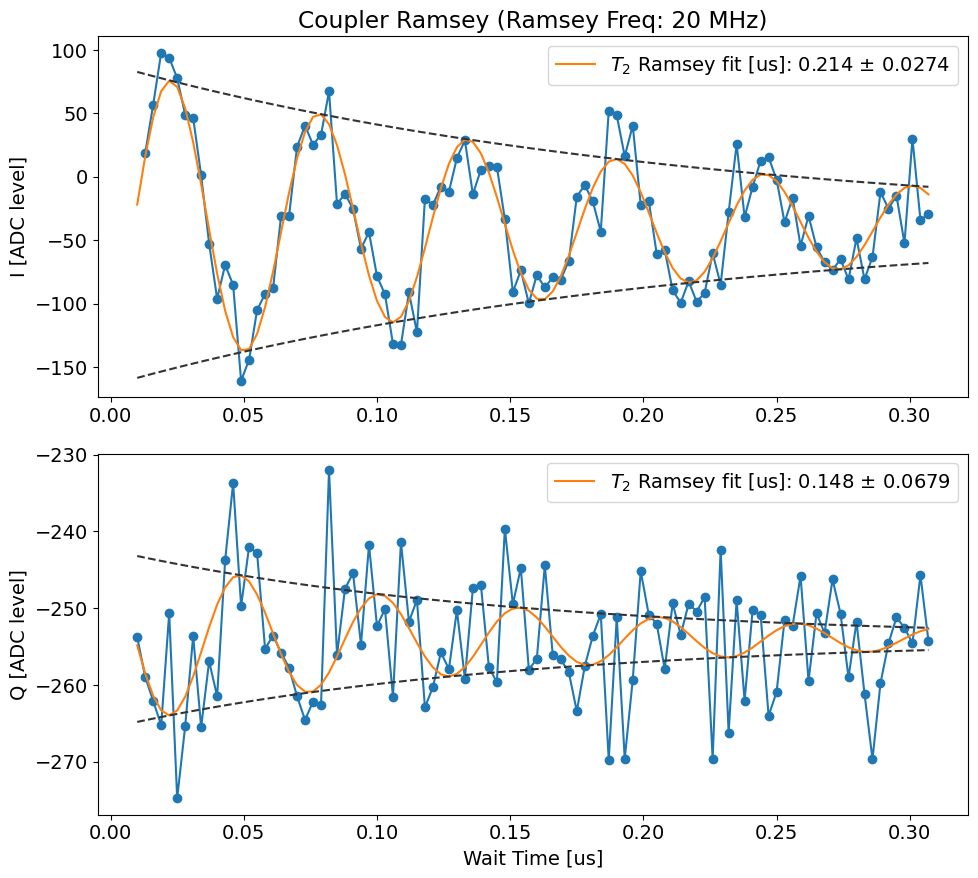

(0.21359651175814287, 0.02737107600774066)

In [516]:
temp_data, attrs = prev_data(expt_path, '00088_CavityRamseyExperiment.h5')
# temp_data, attrs = prev_data(expt_path, '00207_CavityRamseyExperiment.h5')
Ramsey_display(temp_data, attrs, ramsey_freq=attrs['config']['expt']['ramsey_freq'], 
               active_reset=False, threshold=-4.323194812977462, readouts_per_rep=4, initial_freq=attrs['config']['expt']['user_defined_pulse'][1], fit=True, fitparams = None, title='Coupler Ramsey')

#### Collecting T2 Data in dataframe

##### Make new Df

In [549]:
coup_t2_df = pd.DataFrame({'currents': {}, 'T2': {}, 'T2_err': {}, 'gain': {}, 'freq': {}, 'pi_length': {}, 'file_name': {}})
coup_t2_df

# current = 0.58
# T1 = 100
# T1_err = 10
# gain = 5000
# freq = 1000
# file_name = '00016_SidebandT1GeneralExperiment.h5'

# # Add data to the DataFrame
# coup_t1_df.loc[len(coup_t1_df)] = [current, T1, T1_err, gain, freq, file_name]

# # Display the updated DataFrame
# coup_t1_df


,currents,T2,T2_err,gain,freq,pi_length,file_name


##### Add data to Df`

Current pi pulse frequency: 2006.72
Fit frequency from I [MHz]: 6.14136156630411 +/- 0.0062908258856953295
Suggested new pi pulse frequency from fit I [MHz]:
 	2008.8613615663041
 	1996.578638433696
T2 Ramsey from fit I [us]: 1.1294182237408341
Fit frequency from Q [MHz]: 15.224690345055327 +/- 0.3026394026899635
Suggested new pi pulse frequencies from fit Q [MHz]:
 	2017.9446903450553
 	1987.4953096549448
T2 Ramsey from fit Q [us]: 0.5456443089083108


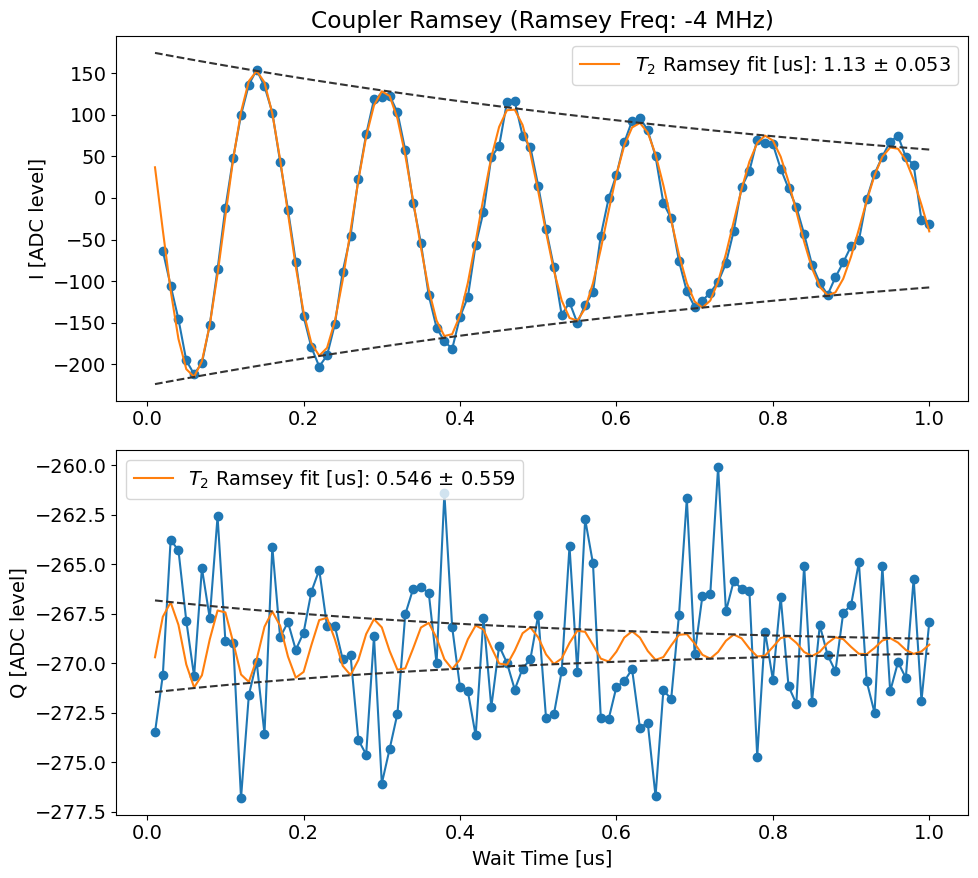

In [561]:
file_name = '00014_CavityRamseyExperiment.h5'
temp_data, attrs = prev_data(expt_path, file_name)
t2, t2_err = Ramsey_display(temp_data, attrs, ramsey_freq=attrs['config']['expt']['ramsey_freq'], 
               active_reset=False, threshold=-4.323194812977462, readouts_per_rep=4, initial_freq=attrs['config']['expt']['user_defined_pulse'][1], fit=True, fitparams = None, title='Coupler Ramsey')

In [562]:
current = 0.08
T2 = t2
T2_err = t2_err
gain = attrs['config']['expt']['custom_coupler_pulse'][1][0]
freq = attrs['config']['expt']['custom_coupler_pulse'][0][0]
pi_length = attrs['config']['expt']['custom_coupler_pulse'][2][0]
file_name = file_name

# Add data to the DataFrame
coup_t2_df.loc[len(coup_t2_df)] = [current, T2, T2_err, gain, freq, pi_length, file_name]
coup_t2_df

,currents,T2,T2_err,gain,freq,pi_length,file_name
0,0.560,0.113744,0.013517,2175,2037.35,0.193027,00026_CavityRamseyExperiment.h5
1,0.565,0.118128,0.016479,3500,2073.50,0.137573,00038_CavityRamseyExperiment.h5
2,0.320,0.386678,0.038176,1000,944.25,0.316678,00022_CavityRamseyExperiment.h5
3,0.450,0.220114,0.013733,2000,1435.00,0.172341,00089_CavityRamseyExperiment.h5
4,-0.200,48.307903,2.454736,5000,283.25,0.708320,00008_CavityRamseyExperiment.h5
5,0.080,1.129418,0.053034,2500,440.05,0.227493,00014_CavityRamseyExperiment.h5


##### Save Df

In [597]:
# save in dataframe 
# Assuming df is your DataFrame and parent_path is defined
folder = os.path.join(data_parent_path, 'RAM_paper_results', 'datasets')
file_name = 'CouplerT2.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Save the DataFrame to a CSV file
coup_t2_df.to_csv(file_path, index=False)

print(f"DataFrame saved to {file_path}")

DataFrame saved to h:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets\CouplerT2.csv


In [598]:
# drop a row 
coup_t2_df 

,currents,T2,T2_err,gain,freq,pi_length,file_name
0,0.560,0.113744,0.013517,2175,2037.35,0.193027,00026_CavityRamseyExperiment.h5
1,0.565,0.118128,0.016479,3500,2073.50,0.137573,00038_CavityRamseyExperiment.h5
2,0.320,0.386678,0.038176,1000,944.25,0.316678,00022_CavityRamseyExperiment.h5
3,0.450,0.220114,0.013733,2000,1435.00,0.172341,00089_CavityRamseyExperiment.h5
4,-0.200,48.307903,2.454736,5000,283.25,0.708320,00008_CavityRamseyExperiment.h5
5,0.080,1.129418,0.053034,2500,440.05,0.227493,00014_CavityRamseyExperiment.h5


# Cavity T2

Current pi pulse frequency: 1977.7
Fit frequency from I [MHz]: 0.06336200470344713 +/- 5.011000046698238e-05
Suggested new pi pulse frequency from fit I [MHz]:
 	1980.2066379952967
 	1980.3333620047035
T2 Ramsey from fit I [us]: 172.9845114304988
Fit frequency from Q [MHz]: 0.016181590033328523 +/- 0.006735238612292506
Suggested new pi pulse frequencies from fit Q [MHz]:
 	1980.2538184099667
 	1980.2861815900333
T2 Ramsey from fit Q [us]: 29.400000000346978


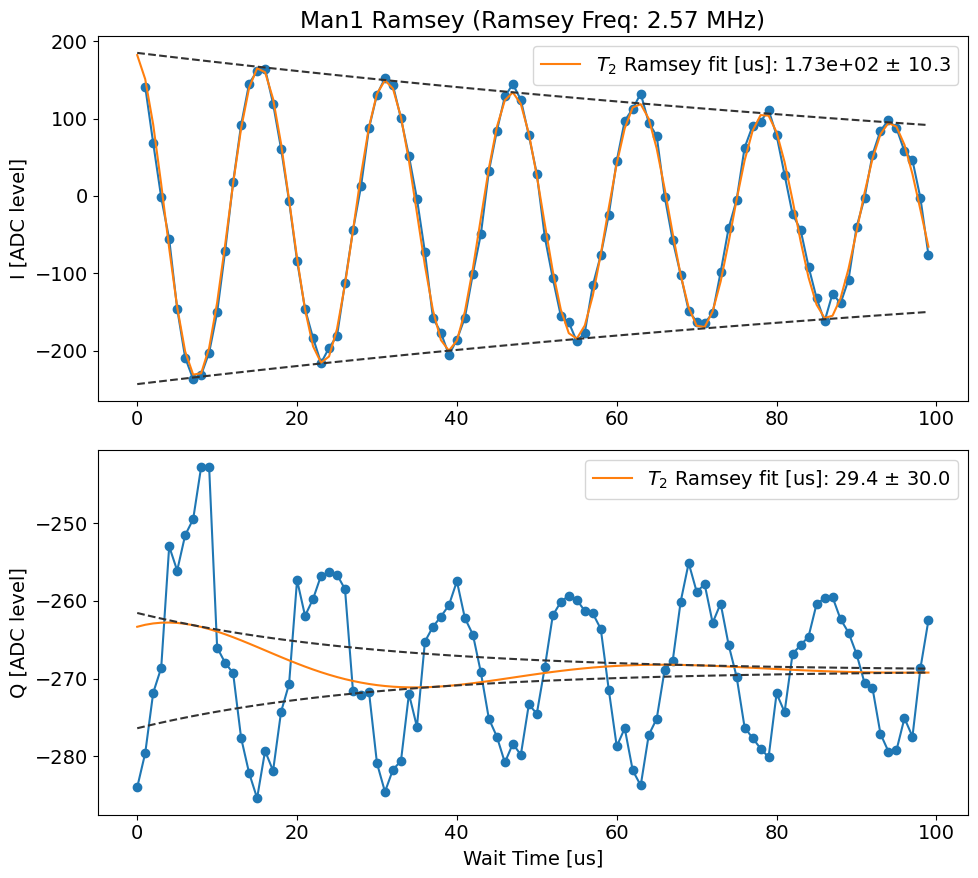

In [207]:
temp_data, attrs = prev_data(expt_path, '00052_CavityRamseyExperiment.h5')# 0.57 ma
# temp_data, attrs = prev_data(expt_path, '00056_CavityRamseyExperiment.h5')# 0.6ma
# temp_data, attrs = prev_data(expt_path, '00063_CavityRamseyExperiment.h5')# 0.585 ma
temp_data, attrs = prev_data(expt_path, '00066_CavityRamseyExperiment.h5')# 0.50 ma
temp_data, attrs = prev_data(expt_path, '00071_CavityRamseyExperiment.h5')# 0.40 ma
temp_data, attrs = prev_data(expt_path, '00074_CavityRamseyExperiment.h5')# 0.30 ma
temp_data, attrs = prev_data(expt_path, '00077_CavityRamseyExperiment.h5')# 0.12 ma
temp_data, attrs = prev_data(expt_path, '00080_CavityRamseyExperiment.h5')# -0.05 ma
temp_data, attrs = prev_data(expt_path, '00086_CavityRamseyExperiment.h5')# -0.2 ma
# temp_data, attrs = prev_data(expt_path, '00207_CavityRamseyExperiment.h5')
Ramsey_display(temp_data, attrs, ramsey_freq=attrs['config']['expt']['ramsey_freq'], 
               active_reset=False, threshold=-4.323194812977462, readouts_per_rep=4, initial_freq=attrs['config']['expt']['user_defined_pulse'][1], fit=True, fitparams = None, title='Man1 Ramsey')

##### Make new Df

In [569]:
man_t2_df = pd.DataFrame({'currents': {}, 'T2': {}, 'T2_err': {}, 'file_name': {}})
man_t2_df

# current = 0.58
# T1 = 100
# T1_err = 10
# gain = 5000
# freq = 1000
# file_name = '00016_SidebandT1GeneralExperiment.h5'

# # Add data to the DataFrame
# coup_t1_df.loc[len(coup_t1_df)] = [current, T1, T1_err, gain, freq, file_name]

# # Display the updated DataFrame
# coup_t1_df


,currents,T2,T2_err,file_name


##### Add data to Df`

Current pi pulse frequency: 1977.7
Fit frequency from I [MHz]: 0.06336200470344713 +/- 5.011000046698238e-05
Suggested new pi pulse frequency from fit I [MHz]:
 	1980.2066379952967
 	1980.3333620047035
T2 Ramsey from fit I [us]: 172.9845114304988
Fit frequency from Q [MHz]: 0.016181590033328523 +/- 0.006735238612292506
Suggested new pi pulse frequencies from fit Q [MHz]:
 	1980.2538184099667
 	1980.2861815900333
T2 Ramsey from fit Q [us]: 29.400000000346978


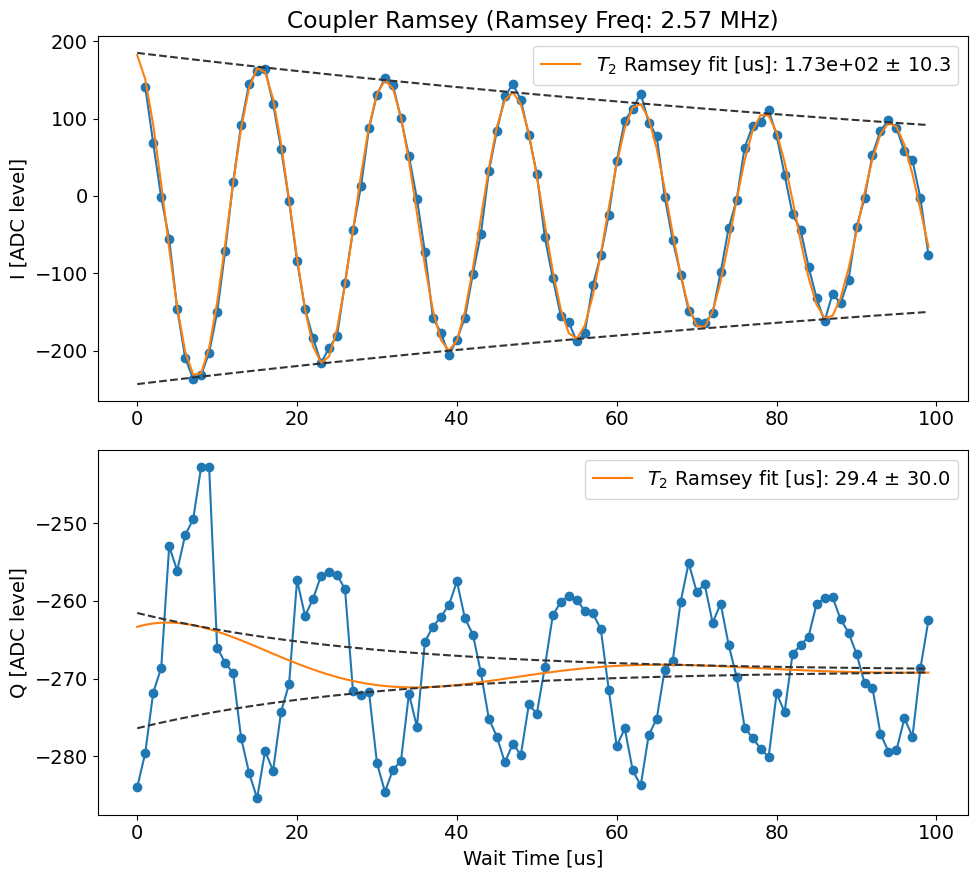

In [584]:
file_name = '00086_CavityRamseyExperiment.h5'
temp_data, attrs = prev_data(expt_path, file_name)
t2, t2_err = Ramsey_display(temp_data, attrs, ramsey_freq=attrs['config']['expt']['ramsey_freq'], 
               active_reset=False, threshold=-4.323194812977462, readouts_per_rep=4, initial_freq=attrs['config']['expt']['user_defined_pulse'][1], fit=True, fitparams = None, title='Coupler Ramsey')

In [585]:
current = -0.2
T2 = t2
T2_err = t2_err
file_name = file_name

# Add data to the DataFrame
man_t2_df.loc[len(man_t2_df)] = [current, T2, T2_err, file_name]
man_t2_df

,currents,T2,T2_err,file_name
0,0.585,19.239746,1.421020,00063_CavityRamseyExperiment.h5
1,0.570,147.477509,7.386751,00052_CavityRamseyExperiment.h5
2,0.500,108.851901,4.610384,00066_CavityRamseyExperiment.h5
3,0.400,75.810401,3.331322,00071_CavityRamseyExperiment.h5
4,0.300,71.144428,3.546478,00074_CavityRamseyExperiment.h5
5,0.120,36.094442,1.599409,00077_CavityRamseyExperiment.h5
6,-0.050,36.087576,2.162266,00080_CavityRamseyExperiment.h5
7,-0.200,172.984511,10.261186,00086_CavityRamseyExperiment.h5


##### Save Df

In [599]:
# save in dataframe 
# Assuming df is your DataFrame and parent_path is defined
folder = os.path.join(data_parent_path, 'RAM_paper_results', 'datasets')
file_name = 'ManT2.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Save the DataFrame to a CSV file
man_t2_df.to_csv(file_path, index=False)

print(f"DataFrame saved to {file_path}")

DataFrame saved to h:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets\ManT2.csv


# Plot Coherences

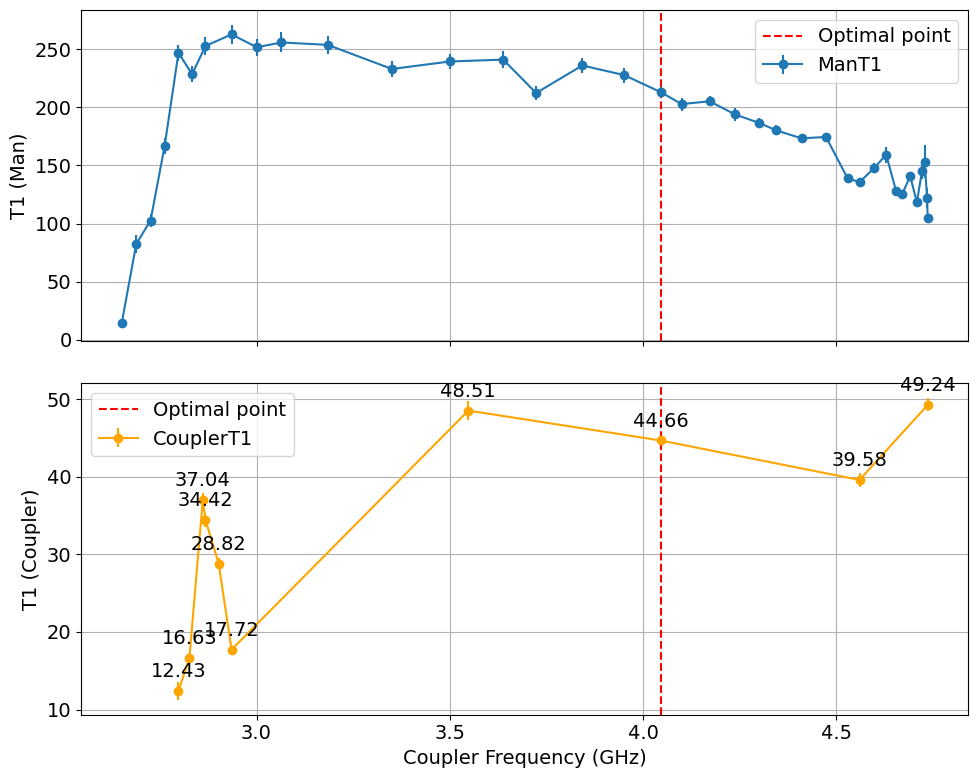

In [630]:
man_t1_df_name = 'ManT1.csv'
coupler_t1_df_name = 'CouplerT1.csv'

# Load the DataFrames from the CSV files
folder = os.path.join(data_parent_path, 'RAM_paper_results', 'datasets')
man_t1_df = pd.read_csv(os.path.join(folder, man_t1_df_name))
coupler_t1_df = pd.read_csv(os.path.join(folder, coupler_t1_df_name))

x1 = man_t1_df['currents']
y1 = man_t1_df['T1']
y1_errs = man_t1_df['T1_err']

# Get the indices that would sort x1
sorted_indices = np.argsort(x1)

# Apply the sorted indices to x1, y1, and y1_errs
x1_sorted = x1.iloc[sorted_indices].reset_index(drop=True)
y1_sorted = y1.iloc[sorted_indices].reset_index(drop=True)
y1_errs_sorted = y1_errs.iloc[sorted_indices].reset_index(drop=True)

# do the same for x2 
x2 = coupler_t1_df['currents']
y2 = coupler_t1_df['T1']
y2_errs = coupler_t1_df['T1_err']

# Get the indices that would sort x2
sorted_indices = np.argsort(x2)

# Apply the sorted indices to x2, y2, and y2_errs
x2_sorted = x2.iloc[sorted_indices].reset_index(drop=True)
y2_sorted = y2.iloc[sorted_indices].reset_index(drop=True)
y2_errs_sorted = y2_errs.iloc[sorted_indices].reset_index(drop=True)

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# Plot data for man_t1_df
x1_new = qubit_gf - np.array(f0g1_interp_func(x1_sorted)) - coupler_func(x1_sorted)
ax1.errorbar(x1_new*1e-3, y1_sorted, yerr=y1_errs_sorted, fmt='o-', label='ManT1')
ax1.set_ylabel('T1 (Man)')
ax1.legend()
ax1.grid(True)

# Plot data for coupler_t1_df
x2_new = qubit_gf - np.array(f0g1_interp_func(x2_sorted)) - coupler_func(x2_sorted)
ax2.errorbar(x2_new * 1e-3, y2_sorted, yerr=y2_errs_sorted, fmt='o-', label='CouplerT1', color='orange')
ax2.set_xlabel('Coupler Frequency (GHz)')
ax2.set_ylabel('T1 (Coupler)')
ax2.legend()
ax2.grid(True)

# Annotate points in the second subplot
for i, txt in enumerate(y2_sorted):
    ax2.annotate(f'{txt:.2f}', (x2_new[i]*1e-3, y2_sorted[i]), textcoords="offset points", xytext=(0,10), ha='center')


# Add vertical line at current 0.32
current = 0.32
x = qubit_gf - np.array(f0g1_interp_func(current)) - coupler_func(current)
ax2.axvline(x*1e-3 , color='red', linestyle='--', label='Optimal point')
ax1.axvline(x*1e-3 , color='red', linestyle='--', label='Optimal point')
ax1.legend()
ax2.legend()


# Display the plots
plt.tight_layout()
plt.show()




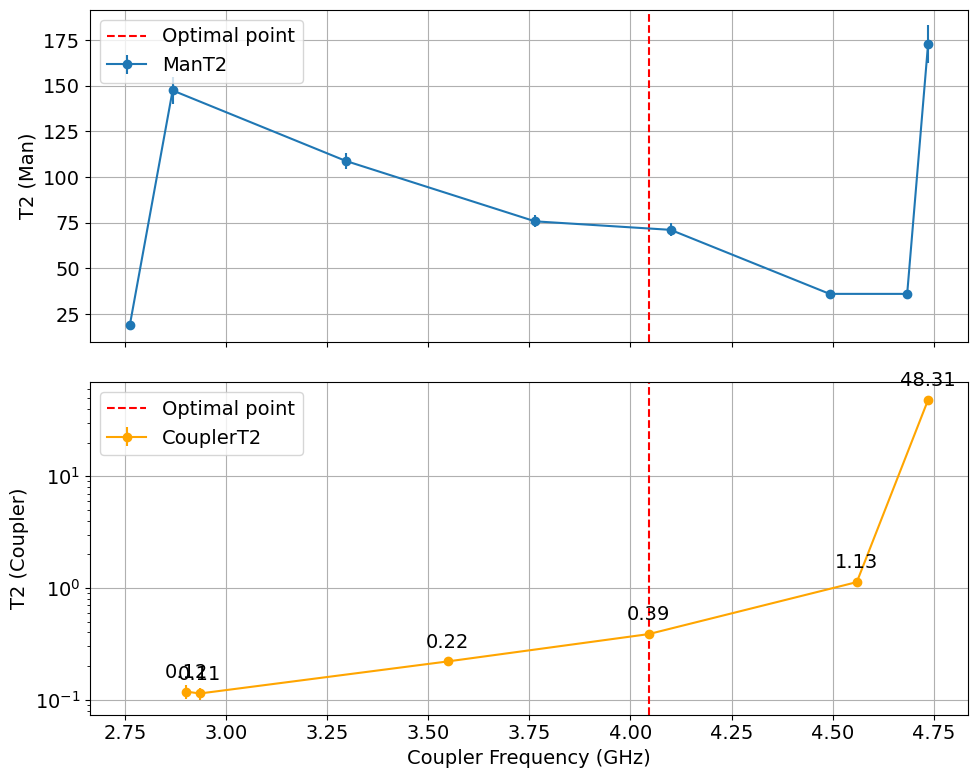

In [631]:
man_t1_df_name = 'ManT2.csv'
coupler_t1_df_name = 'CouplerT2.csv'

# Load the DataFrames from the CSV files
folder = os.path.join(data_parent_path, 'RAM_paper_results', 'datasets')
man_t1_df = pd.read_csv(os.path.join(folder, man_t1_df_name))
coupler_t1_df = pd.read_csv(os.path.join(folder, coupler_t1_df_name))

x1 = man_t1_df['currents']
# x1 = qubit_gf - np.array(f0g1_interp_func(x1)) - coupler_func(x1)
y1 = man_t1_df['T2']
y1_errs = man_t1_df['T2_err']

# Get the indices that would sort x1
sorted_indices = np.argsort(x1)

# Apply the sorted indices to x1, y1, and y1_errs
x1_sorted = x1.iloc[sorted_indices].reset_index(drop=True)
y1_sorted = y1.iloc[sorted_indices].reset_index(drop=True)
y1_errs_sorted = y1_errs.iloc[sorted_indices].reset_index(drop=True)

# do the same for x2 
x2 = coupler_t1_df['currents']
# x2 = qubit_gf - np.array(f0g1_interp_func(x2)) - coupler_func(x2)
y2 = coupler_t1_df['T2']
y2_errs = coupler_t1_df['T2_err']

# Get the indices that would sort x2
sorted_indices = np.argsort(x2)

# Apply the sorted indices to x2, y2, and y2_errs
x2_sorted = x2.iloc[sorted_indices].reset_index(drop=True)
y2_sorted = y2.iloc[sorted_indices].reset_index(drop=True)
y2_errs_sorted = y2_errs.iloc[sorted_indices].reset_index(drop=True)

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# Plot data for man_t1_df
x1_new = qubit_gf - np.array(f0g1_interp_func(x1_sorted)) - coupler_func(x1_sorted)
ax1.errorbar(x1_new*1e-3, y1_sorted, yerr=y1_errs_sorted, fmt='o-', label='ManT2')
ax1.set_ylabel('T2 (Man)')
ax1.legend()
ax1.grid(True)

# Plot data for coupler_t1_df
x2_new = qubit_gf - np.array(f0g1_interp_func(x2_sorted)) - coupler_func(x2_sorted)
ax2.errorbar(x2_new * 1e-3, y2_sorted, yerr=y2_errs_sorted, fmt='o-', label='CouplerT2', color='orange')
ax2.set_xlabel('Coupler Frequency (GHz)')
ax2.set_ylabel('T2 (Coupler)')
ax2.set_yscale('log')
ax2.legend()
ax2.grid(True)

# Annotate points in the second subplot
for i, txt in enumerate(y2_sorted):
    ax2.annotate(f'{txt:.2f}', (x2_new[i] * 1e-3, y2_sorted[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add vertical line at current 0.32
current = 0.32
x = qubit_gf - np.array(f0g1_interp_func(current)) - coupler_func(current)
ax2.axvline(x*1e-3 , color='red', linestyle='--', label='Optimal point')
ax1.axvline(x*1e-3 , color='red', linestyle='--', label='Optimal point')
ax1.legend()
ax2.legend()


# Display the plots
plt.tight_layout()
plt.show()

In [609]:
man_t1_df

,currents,T1,T1_err,file_name
0,-0.200,104.538594,1.630250,00082_cavity_t1_dc_flux_sweep_new.h5
1,-0.170,122.208819,8.383097,00084_cavity_t1_dc_flux_sweep_new.h5
2,-0.140,153.286526,14.069547,00086_cavity_t1_dc_flux_sweep_new.h5
3,-0.120,145.410579,7.097924,00088_cavity_t1_dc_flux_sweep_new.h5
4,-0.090,118.409589,2.361209,00090_cavity_t1_dc_flux_sweep_new.h5
5,-0.060,140.647633,3.925063,00092_cavity_t1_dc_flux_sweep_new.h5
6,-0.030,125.638037,3.455814,00094_cavity_t1_dc_flux_sweep_new.h5
7,-0.010,127.754302,2.214225,00096_cavity_t1_dc_flux_sweep_new.h5
8,0.020,159.247814,6.985906,00098_cavity_t1_dc_flux_sweep_new.h5
9,0.050,147.987348,4.555701,00100_cavity_t1_dc_flux_sweep_new.h5
